In [4]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
%matplotlib inline

In [5]:
#Parse dates to remove warning at 47th column (next_payment.dt)
df_loan=pd.read_csv('loan.csv',parse_dates=[47])
df_loan.columns[47]

'next_pymnt_d'

In [6]:
# Examine the data set
df_loan.info()
df_loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [7]:
#Identify the level of the data-'id' is the level of the data
df_loan['id'].nunique()
df_loan['member_id'].nunique()

39717

# Data cleaning

In [8]:
## Remove  behaviour columns

# Define  behaviour variables
loan_behav_vars=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

# Remove the above variables from data set
df_loan.drop(loan_behav_vars,axis=1,inplace=True)


#check number of columns after removal-90 columns remain
df_loan.shape

(39717, 90)

In [9]:
#Remove rows containing loan_status='current' 
df_loan.drop(df_loan[df_loan['loan_status']=='Current'].index,axis=0,inplace=True)

df_loan.shape

(38577, 90)

In [10]:
#Remove columns with null values

# Define function which returns % null values
def perc_null_col (x):
     return (x.isnull()|x.isin(['NA','na'])).sum()/df_loan.shape[0]
    
# Define function to return 1 for columns with only one value
def one_val_col(x):
    if x.value_counts().size==1:
        return 1
    else:
        return 0    

# Apply perc_null_col function to all columns
df_data_clean=pd.DataFrame(df_loan.apply(perc_null_col,axis=0),columns=['perc_null'])

# Apply one_val_col function to all columns
df_data_clean['flag_one_val']=df_loan.apply(one_val_col,axis=0)


# Create list of columns where there are more than 90% null values or only single value is present
cols_drop=list(df_data_clean[((df_data_clean['perc_null']>=0.90)&(df_data_clean['perc_null']<=1))|(df_data_clean['flag_one_val']==1)].index)

# Drop columns from above list
df_loan.drop(cols_drop,axis=1,inplace=True)

# Drop irrelevant columns
irrel_cols=['member_id','url']
df_loan.drop(irrel_cols,axis=1,inplace=True)

#check number of columns after removal-27 columns remain
df_loan.shape

(38577, 24)

In [11]:
#Check duplicate rows-zero duplicate rows
df_loan_dup = df_loan[df_loan.duplicated()]
df_loan_dup.shape

(0, 24)

In [12]:
# Convert all data types to required format
df_loan['issue_d']=pd.to_datetime(df_loan['issue_d'],format='%b-%y')

# convert interest rate to float
df_loan['int_rate']=[float(i.replace("%","")) for i in df_loan['int_rate']]


# Convert columns to integer
df_loan['funded_amnt_inv']=df_loan['funded_amnt_inv'].astype(int)
df_loan['annual_inc']=df_loan['annual_inc'].astype(int)

#  Not imputing null values - will drop nas during computation
# Columns with null value present:mths_since_last_delinq,pub_rec_bankruptcies,emp_title,emp_length,desc,title
# For all these columns null values can be replace with NAs or any relevant value

In [13]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
id                        38577 non-null int64
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
funded_amnt_inv           38577 non-null int64
term                      38577 non-null object
int_rate                  38577 non-null float64
installment               38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_title                 36191 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null int64
verification_status       38577 non-null object
issue_d                   38577 non-null datetime64[ns]
loan_status               38577 non-null object
desc                      26050 non-null object
purpose                   38577 non-null object
title                 

In [14]:
#####Removing outliers

# Check distribution of variables where values are whole numbers for outliers(%s don't require outlier treatment)

##Observation-it is seen that annual_inc distribution is most skewed and affected by outliers.Hence removing outliers from this column
df_loan[['loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'annual_inc']].describe().astype(int)

##Calculate IQR
Q1 = df_loan['annual_inc'].quantile(0.25)

Q3 = df_loan['annual_inc'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

##Remove outliers
df_loan_out = df_loan[~((df_loan['annual_inc'] < (Q1-1.5 * IQR)) |(df_loan['annual_inc'] > (Q3 + 1.5 * IQR)))]
df_loan=df_loan.loc[df_loan_out.index]
df_loan.shape

42000.0


(36815, 24)

# Data Analysis

__Create derived metrics__

In [15]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36815 entries, 0 to 39716
Data columns (total 24 columns):
id                        36815 non-null int64
loan_amnt                 36815 non-null int64
funded_amnt               36815 non-null int64
funded_amnt_inv           36815 non-null int64
term                      36815 non-null object
int_rate                  36815 non-null float64
installment               36815 non-null float64
grade                     36815 non-null object
sub_grade                 36815 non-null object
emp_title                 34599 non-null object
emp_length                35799 non-null object
home_ownership            36815 non-null object
annual_inc                36815 non-null int64
verification_status       36815 non-null object
issue_d                   36815 non-null datetime64[ns]
loan_status               36815 non-null object
desc                      24890 non-null object
purpose                   36815 non-null object
title                 

In [16]:
# Create flag for charged off columns
df_loan['flag_default']=[1 if i=='Charged Off' else 0 for i in df_loan['loan_status']]

#~15% default rates
df_loan['flag_default'].sum()/df_loan.shape[0]

# Create variables for issue year,month,day
df_loan['issue_year']=df_loan['issue_d'].dt.year.astype(str)
df_loan['issue_month']=df_loan['issue_d'].dt.month.astype(str)

# Create variable for length of desc-Hypothesis:Customer who have high tendency to default can write a longer description
df_loan['len_desc']=df_loan['desc'].str.len()

# Create ratio variables
#Understand what % of applied loan amount is funded by investors
df_loan['amnt_inv_per_loan_amnt']=df_loan['funded_amnt_inv']/df_loan['loan_amnt']
#Understand what is the ratio between applied loan and income, since both of these could be corrleated
df_loan['ratio_loan_inc']=df_loan['loan_amnt']/df_loan['annual_inc']

# Create bins for ratio variables for easy bivariate analysis with category variables
#Divide into three 3 buckets:Low,Medium,High
df_loan['int_rate_bins']=pd.cut(df_loan['int_rate'], 3,labels=["low", "medium", "high"])
df_loan['ratio_loan_inc_bins']=pd.cut(df_loan['ratio_loan_inc'], 3,labels=["low", "medium", "high"])
df_loan['amnt_inv_per_loan_amnt_bins']=pd.cut(df_loan['amnt_inv_per_loan_amnt'], 3,labels=["low", "medium", "high"])

In [17]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36815 entries, 0 to 39716
Data columns (total 33 columns):
id                             36815 non-null int64
loan_amnt                      36815 non-null int64
funded_amnt                    36815 non-null int64
funded_amnt_inv                36815 non-null int64
term                           36815 non-null object
int_rate                       36815 non-null float64
installment                    36815 non-null float64
grade                          36815 non-null object
sub_grade                      36815 non-null object
emp_title                      34599 non-null object
emp_length                     35799 non-null object
home_ownership                 36815 non-null object
annual_inc                     36815 non-null int64
verification_status            36815 non-null object
issue_d                        36815 non-null datetime64[ns]
loan_status                    36815 non-null object
desc                           24890 n

In [18]:
#Separate numeric and categorical variables
num_vars=list(df_loan.loc[:,(df_loan.columns !='flag_default')&(df_loan.columns !='id')].select_dtypes(include=['int64','float64']).columns)
cat_vars=list(df_loan.loc[:,(df_loan.columns !='loan_status')&(df_loan.columns !='desc')&(df_loan.columns !='title')&(df_loan.columns !='emp_title')&(df_loan.columns !='zip_code')].select_dtypes(include=['object','category']).columns)

# Define functions for each type of EDA

__Define function for univariate analysis__

The function takes the arguments:
- Data-The data set on which the analysis should be conducted
- var- The variable for univariate analysis.This can be a single variable or list of variables
- var_type_1 - if variable is numerical or categorical
- analysis_type - if the analysis to be conducted is univariate or segmented univariate.Segmented univariate analysis is conducted with respect to the default rate

In [73]:
def univariate_plots(data,var,var_type,analysis_type):
    if (var_type=='numeric')&(analysis_type=='univariate'):
        for col in var:
            f, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
            axes[0].set_title("Distribution Plot for {}".format(col),weight='bold')
            sns.distplot(data[col].dropna(),ax=axes[0])
            axes[1].set_title("Box Plot for {}".format(col),weight='bold')
            sns.boxplot(x=data[col].dropna(),ax=axes[1],orient='v')
    
    if (var_type=='numeric')&(analysis_type=='segmented univariate'):
        for col in var:
            f, axes=plt.subplots(nrows =1,ncols=1,figsize=(10,5))
            axes.set_title("Distribution of {} in default vs non-default loans".format(col),weight='bold')
            sns.boxplot( x=data['flag_default'],y=data[col].dropna(),orient='v')
    
    if (var_type=='categorical')&(analysis_type=='univariate'):
        for col in list(var):
            var_desc_order=data[col].dropna().value_counts().sort_values(ascending=False)/data.shape[0]
            f, axes=plt.subplots(nrows =1,ncols=1,figsize=(25,5))
            axes.set_title("Volume Distribution of {}".format(col),weight='bold')
            sns.barplot(x=var_desc_order.index,y=var_desc_order.values).set(xlabel=col, ylabel = "Volume %")
            axes.yaxis.set_major_formatter(PercentFormatter(1))   
    
    if (var_type=='categorical')&(analysis_type=='segmented univariate'):
        for col in var:
            var_desc_order=(data.loc[data['flag_default']==1,col].value_counts()/data.loc[:,col].value_counts()).sort_values(ascending=False).index
            f, axes=plt.subplots(nrows =1,ncols=1,figsize=(25,8))
            axes.set_title("Default rates distribution across {}".format(col),weight='bold')
            sns.barplot(x=data[col].dropna(),y=data['flag_default'],order=var_desc_order,ci=None).set(xlabel=col, ylabel = "Default Rate(%)")    
            axes.yaxis.set_major_formatter(PercentFormatter(1))

__Define function for bivariate plots__

The function takes the arguments:
- Data-The data set on which the analysis should be conducted
- var_1- The first variable for bivariate analysis.This can be a single variable or list of variables
- var_2 - the second variable for bivariate analysis.This can be a single variable or list of variables
- var_type_1 - if the first variable is numerical or categorical
- var_type_1 - if the second variable is numerical or categorical

In [20]:
def bivariate_plots(data,var_1,var_2,var_type_1,var_type_2):
    
    # if the first set of variable and second set of variable are numerical
    if (var_type_1=='numeric') & (var_type_2=='numeric'):
        # combine var_1 and var_2
        var_list=var_1+list(set(var_2) - set(var_1))
        ##Plot scatter plots for all variables
        sns.pairplot(df_loan[var_list].dropna())
        #Plot correlation matrix
        f, axes = plt.subplots(1, 2,figsize=(20,5))
        corr_matrix_0= data.loc[data['flag_default']==0,var_list].dropna().corr()
        corr_matrix_1= data.loc[data['flag_default']==1,var_list].dropna().corr()
        #Mask the the second half of the correlation matrix since it consists of repaeated values
        mask_0 = np.triu(np.ones_like(corr_matrix_0, dtype=np.bool))
        mask_1=np.triu(np.ones_like(corr_matrix_1, dtype=np.bool))
        # Plot the heatmap
        sns.heatmap(corr_matrix_0,mask=mask_0,annot=True,cmap="YlGnBu",linewidths=0.5,ax=axes[0])
        sns.heatmap(corr_matrix_1,mask=mask_1,annot=True,cmap="YlGnBu",linewidths=0.5,ax=axes[1])
    
    # if the first set of numerical and second set of variable are categorical
    if (var_type_1=='numeric') & (var_type_2=='categorical'):
        for col1 in var_2:
            for col2 in var_1:
                f, axes=plt.subplots(nrows =1,ncols=1,figsize=(25,5))
                axes.set_title("Distribution of {} across {}".format(col2,col1),weight='bold')
                #Plot a box plot of continuous variable for every categorical variable
                sns.boxplot(x=data[col1],y=data[col2],orient='v')
                
                
    # if the first set of categorical and second set of variable are numerical
    if (var_type_1=='categorical') & (var_type_2=='numeric'):
        for col1 in var_1:
            for col2 in var_2:
                f, axes=plt.subplots(nrows =1,ncols=1,figsize=(10,5))
                axes.set_title("Distribution of {} across {}".format(col2,col1),weight='bold')
                #Plot a box plot of continuous variable for every categorical variable
                sns.boxplot( x=data[col1],y=data[col2],orient='v')
    
    # if the first set of categorical and second set of variable are numerical               
    if (var_type_1=='categorical') & (var_type_2=='categorical'):
        for col1 in var_1:
            for col2 in var_2:
                    # Plot a countplot for var_1 split by every value in var_2
                    g = sns.catplot(x=col1, col=col2, data=data,saturation=.5,kind="count" , ci=None,col_wrap=4,height=5,aspect=0.7,sharey=False,sharex=False)  
                    g.set_xticklabels(data[col1].value_counts().index)
                    g.set(xlabel=col1, ylabel = "No.of loans")
                    plt.subplots_adjust(hspace=0.5,wspace=0.9)
                    plt.subplots_adjust(top=0.87)
                    g.fig.suptitle("Default rate distribution for {} across {}".format(col1, col2),weight='bold')

# Define  function for multivariate Plots:                                                                                        

Note:
- Multivariate Plots is defined for categorical and categorical analysis because we have already binned contibuous variables
- Default rates is the metric Plotted here

Arguments of the function:
- Data-The data set on which the analysis should be conducted
- var_1- The first variable for bivariate analysis.This can be a single variable or list of variables
- var_2 - the second variable for bivariate analysis.This can be a single variable or list of variables 

 

In [21]:
def multivariate_plots(data,var_1,var_2):
        for col1 in var_1:
            for col2 in var_2:
                    # Plot default rate for var_1 split by every value in var_2
                    g = sns.catplot(x=col1, y="flag_default", col=col2,data=data,saturation=.5,kind="bar" , ci=None,col_wrap=4,height=5,aspect=0.7,sharey=False,sharex=False)  
                    g.set_xticklabels(data[col1].value_counts().index)
                    g.set(xlabel="", ylabel = "Default Rates %")
                    plt.subplots_adjust(hspace=0.5,wspace=0.9)
                    plt.subplots_adjust(top=0.87)
                    g.fig.suptitle("Default rate distribution for {} across {}".format(col1, col2),weight='bold')
                    for ax in g.axes.flat:
                        ax.yaxis.set_major_formatter(PercentFormatter(1))

# Plot graphs 

__1. Univariate & Segmented Univariate Analysis__

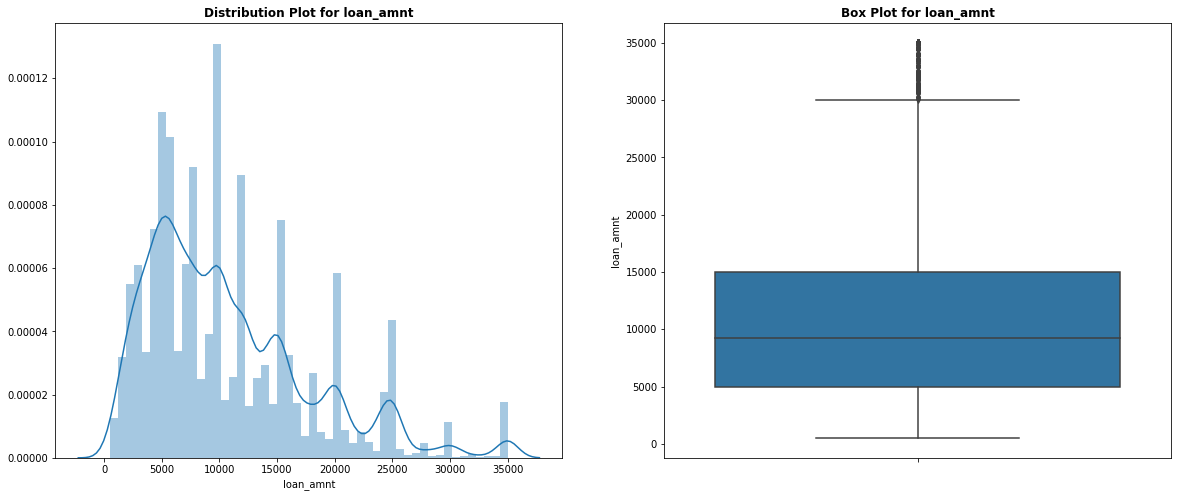

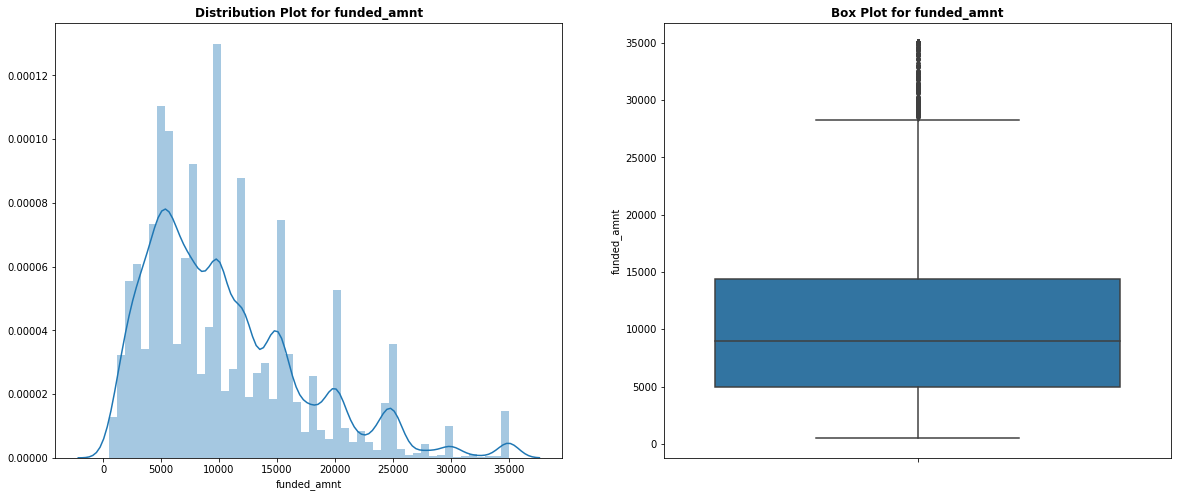

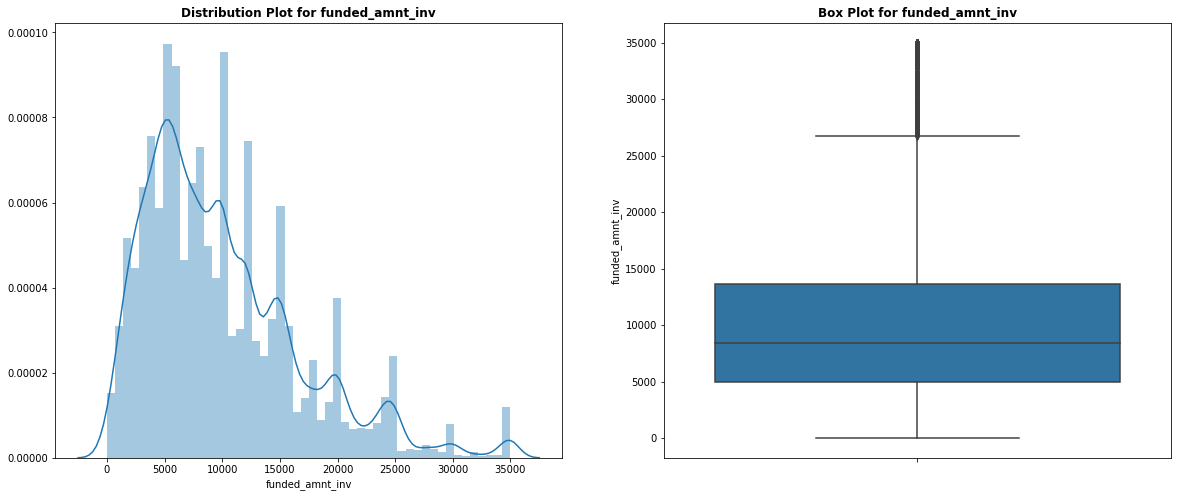

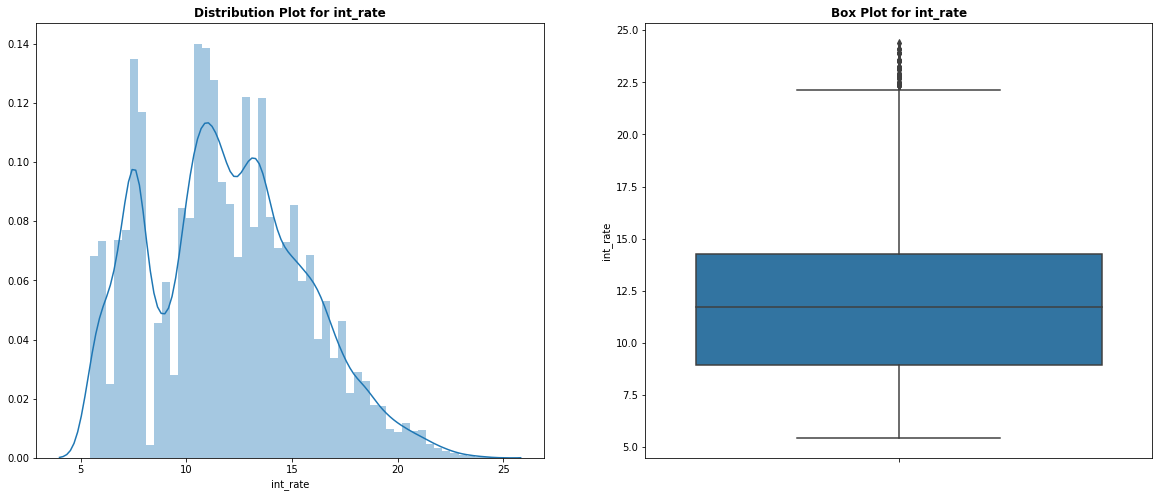

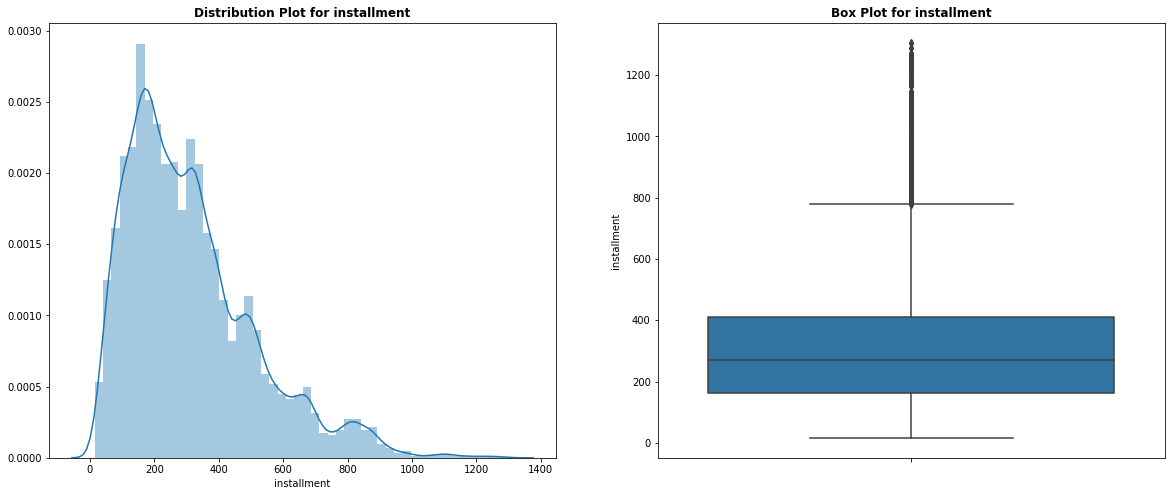

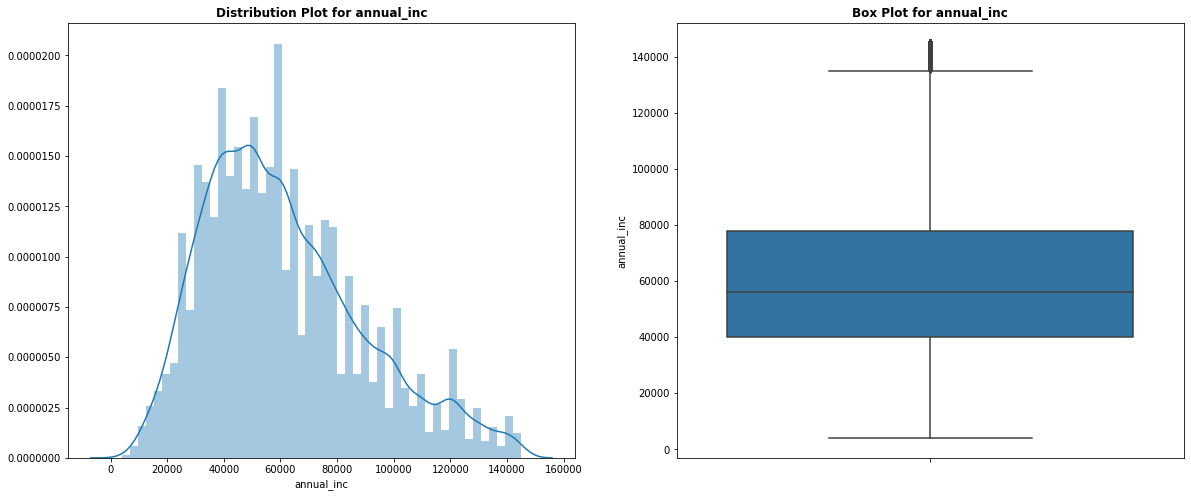

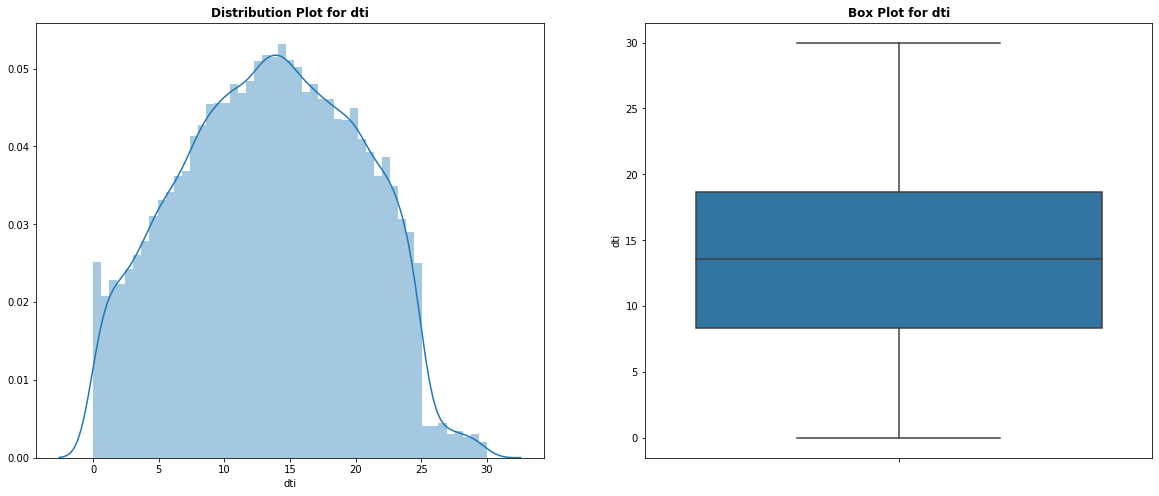

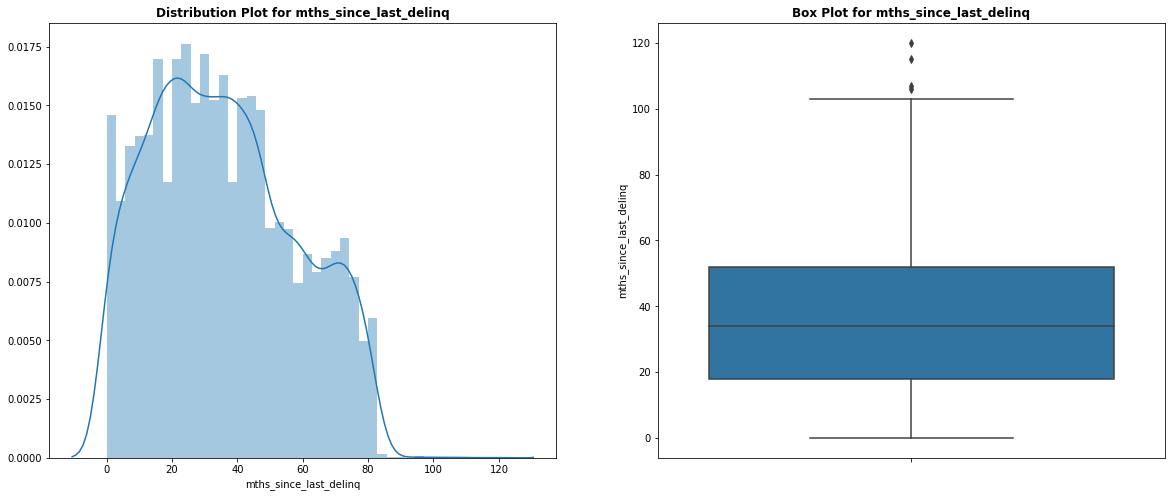

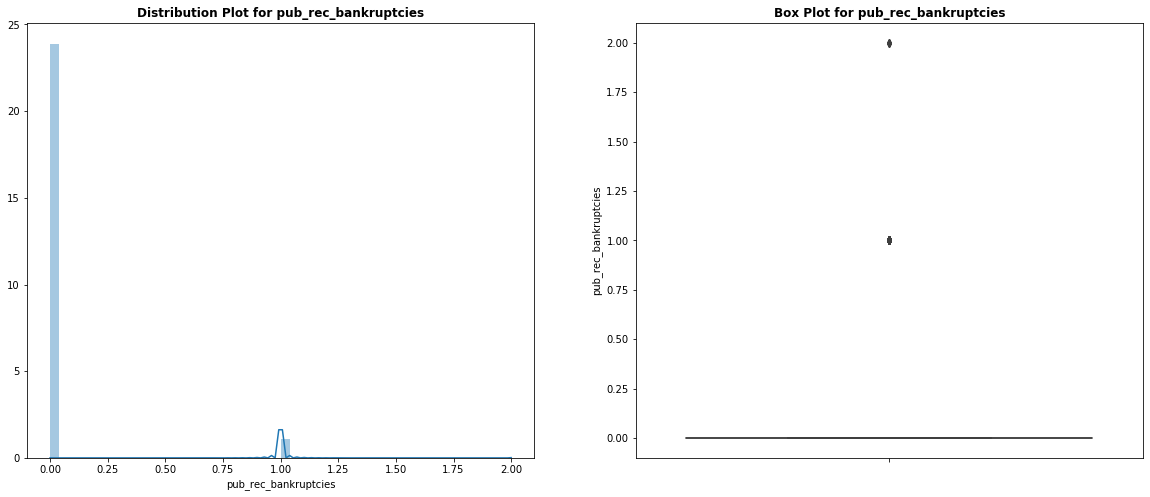

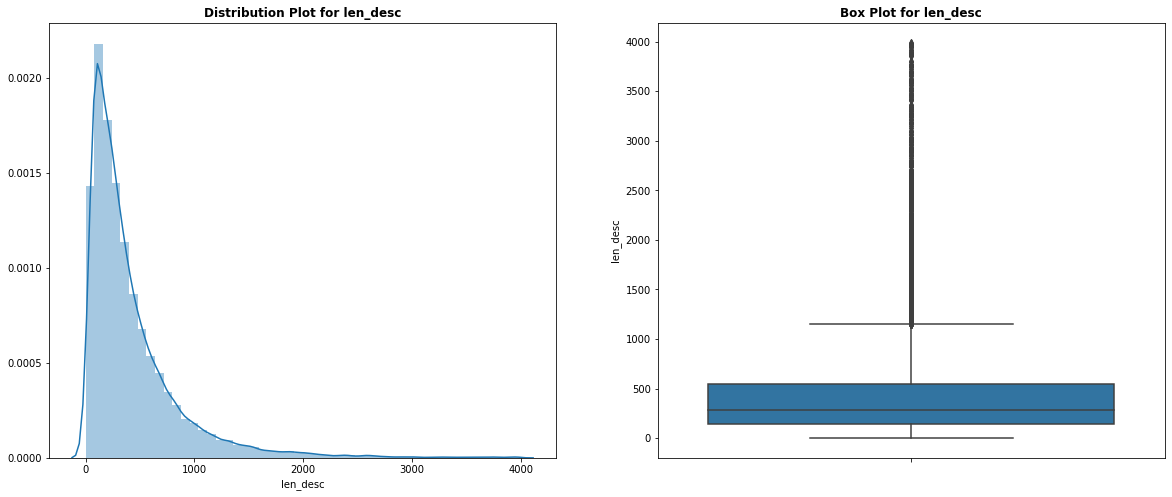

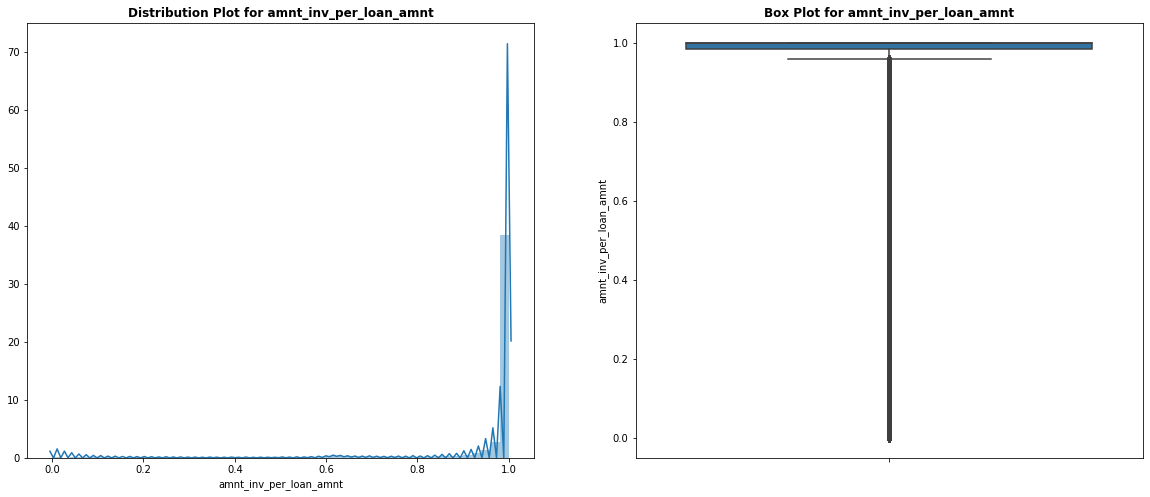

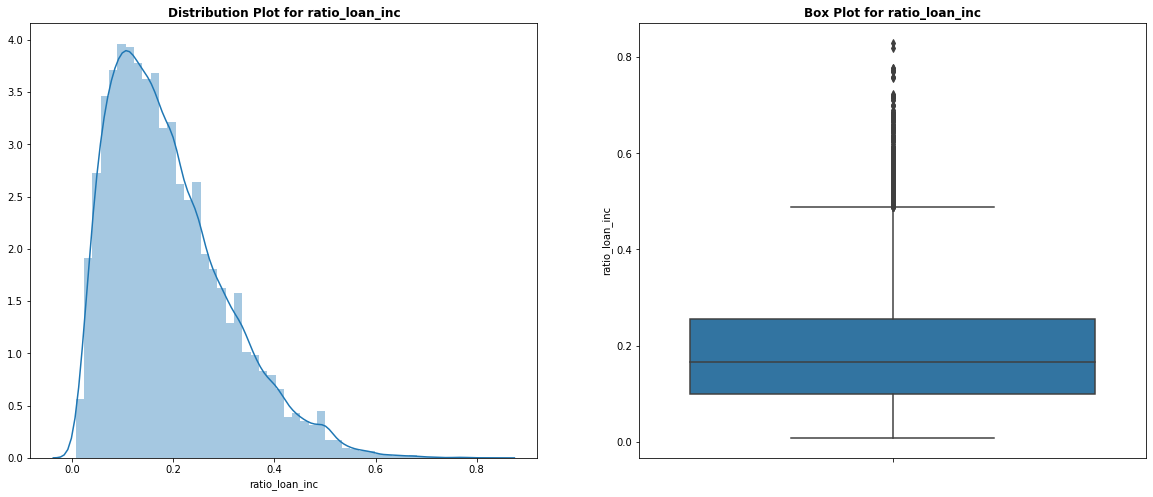

In [22]:
# Univariate analysis for numeric variables.Plot distribution and box plots
univariate_plots(df_loan,num_vars,"numeric","univariate")

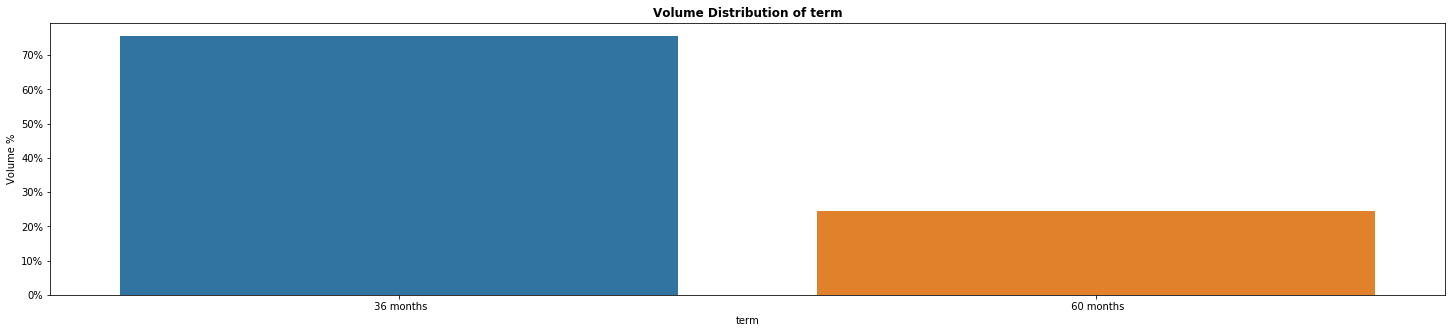

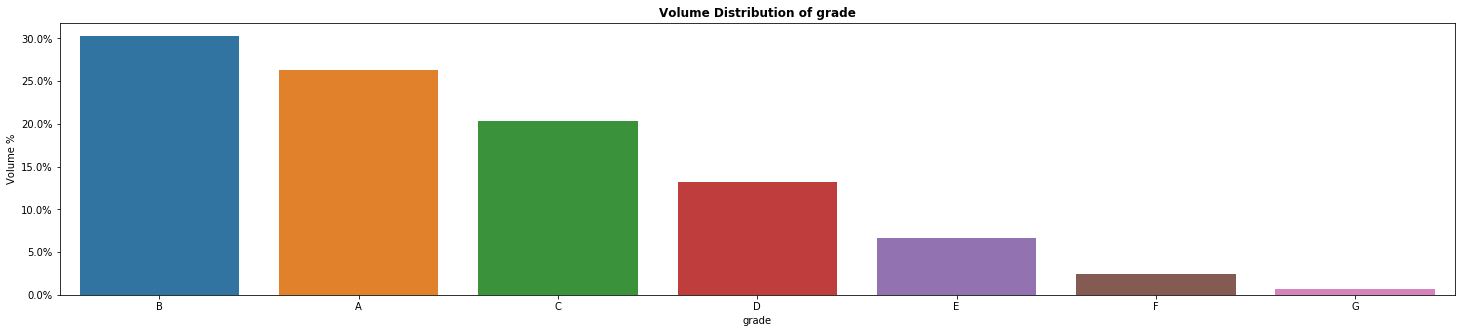

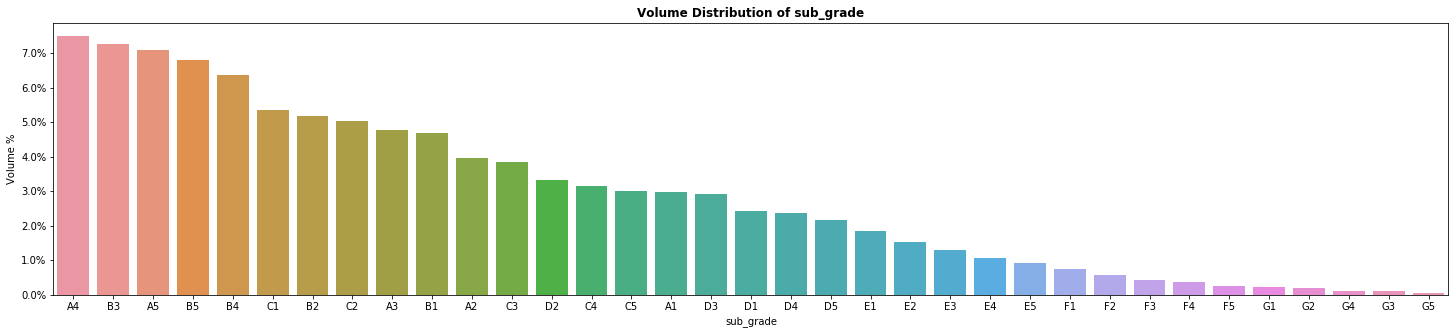

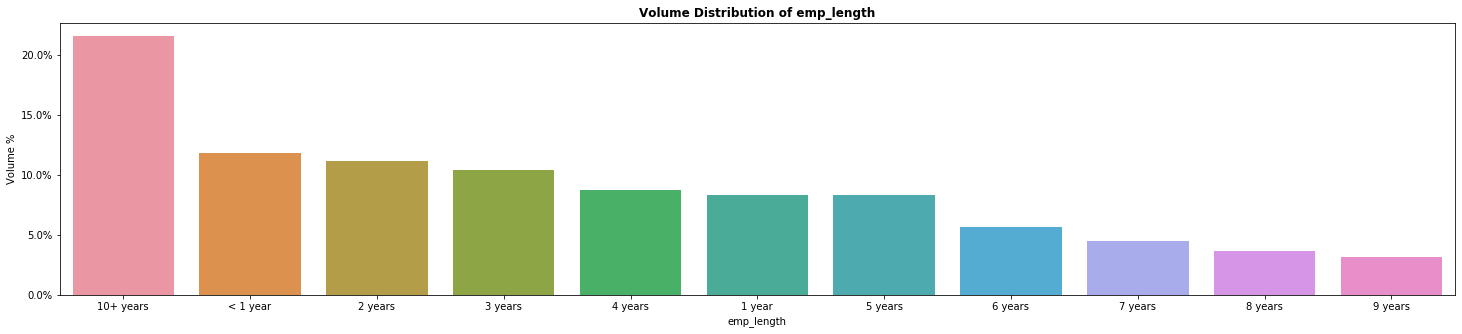

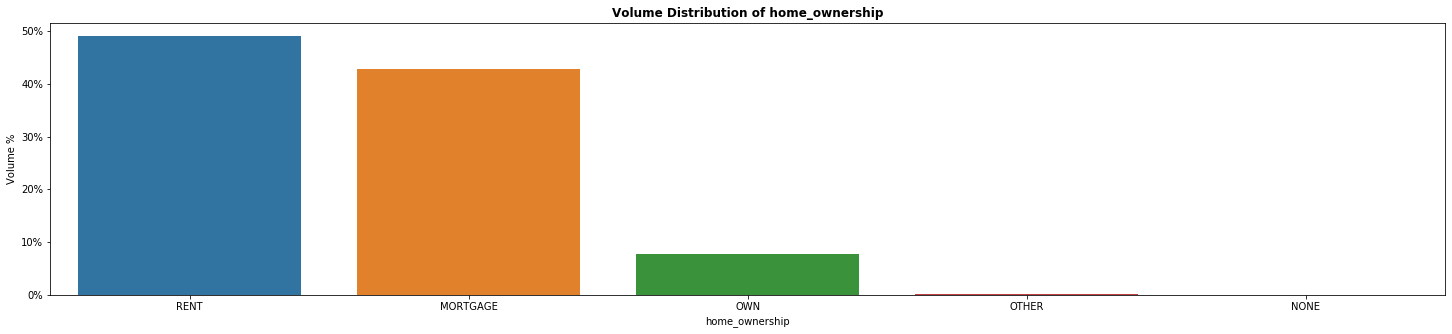

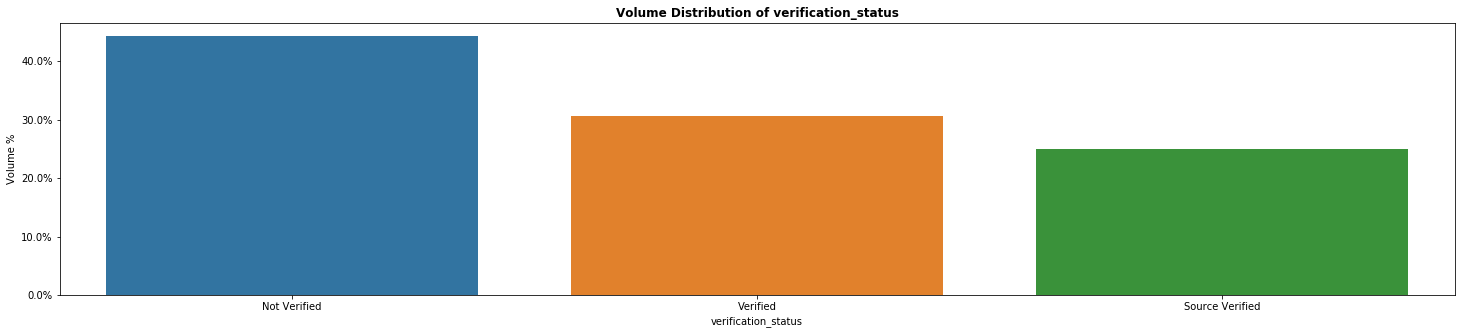

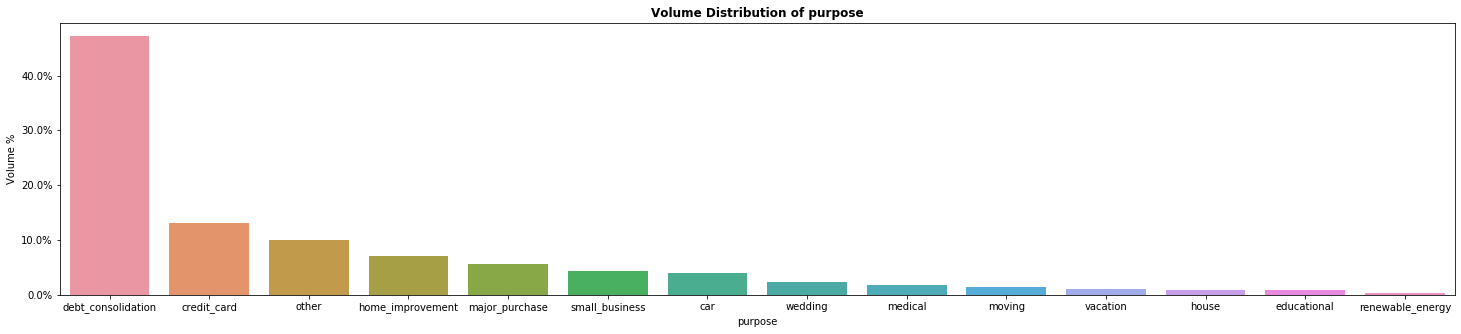

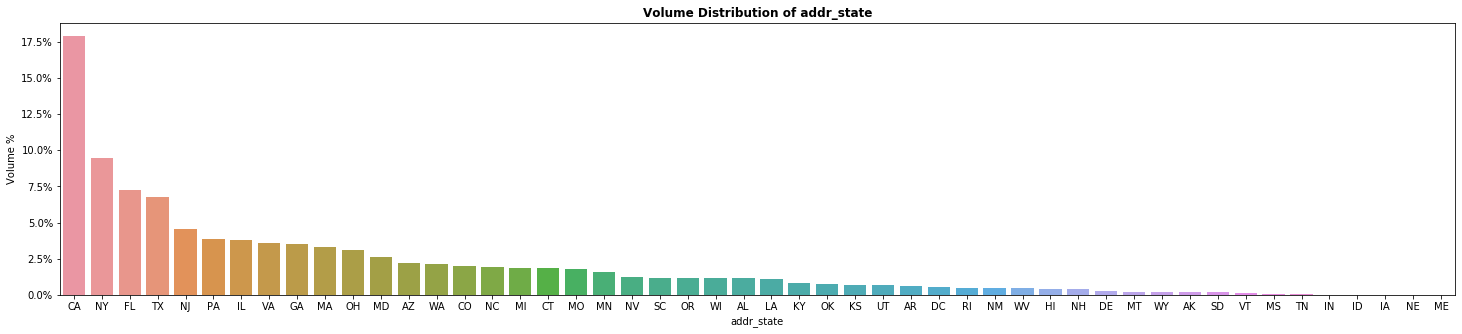

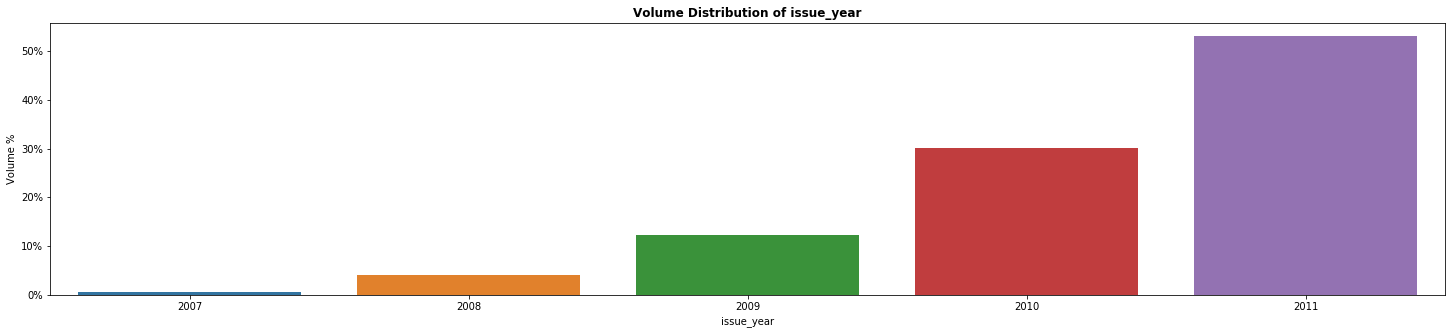

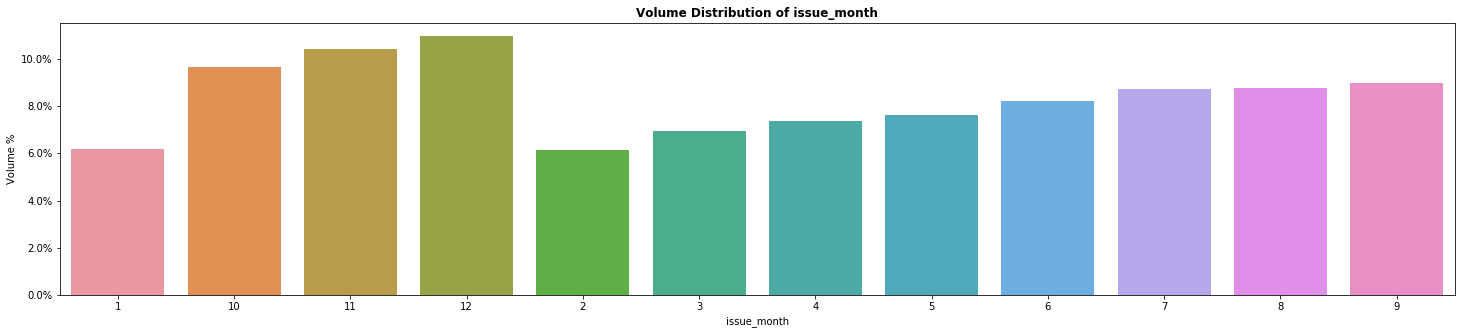

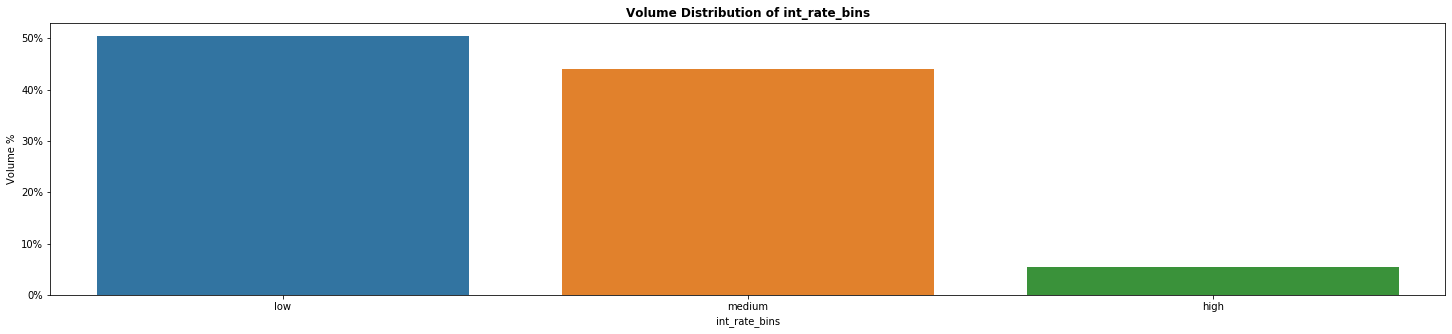

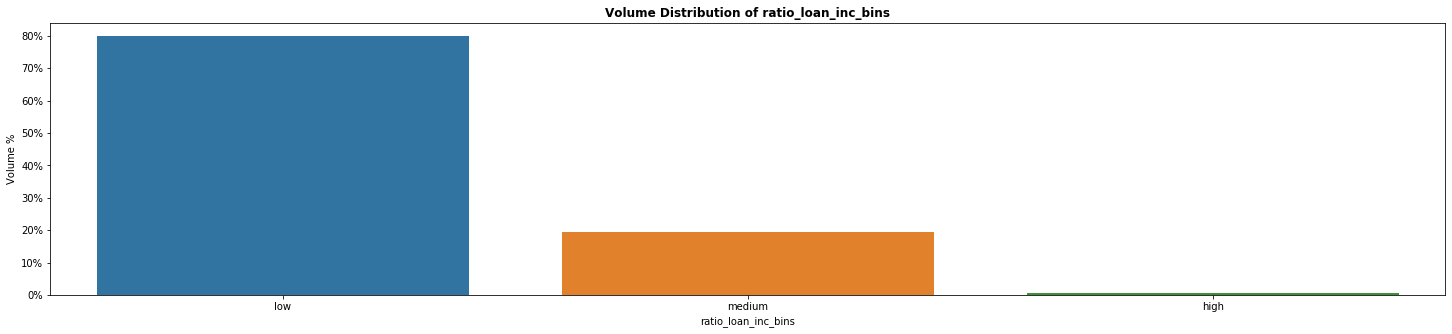

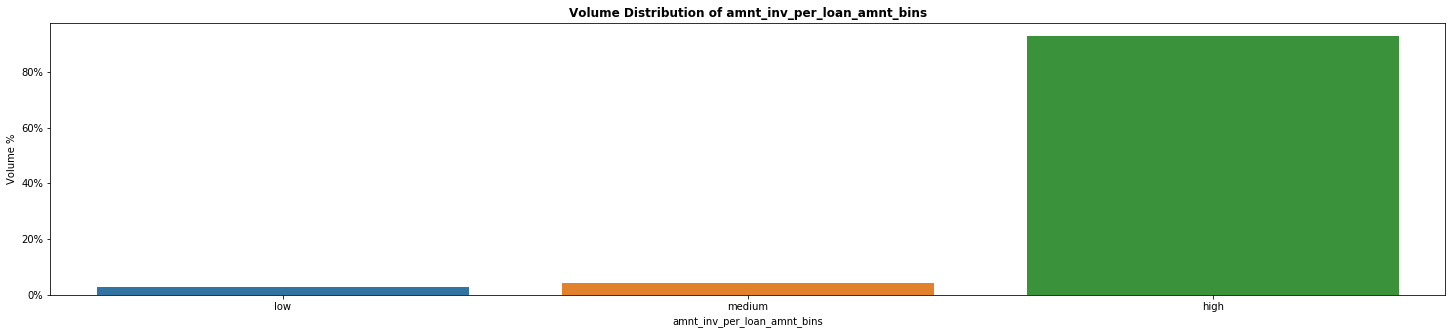

In [74]:
# Univariate analysis for categorical variables.Volume distribution of every variable 
univariate_plots(df_loan,cat_vars,"categorical","univariate")

__Observations from below__:                                                                                             
Significant variables having an impact on default rates:
- Interest Rate - Interest rate is higher for default loans
- Loan to Income Ratio - Loan to income ratio is skewed towards high values for default loans

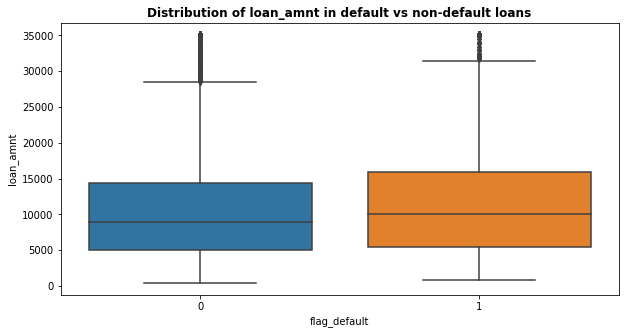

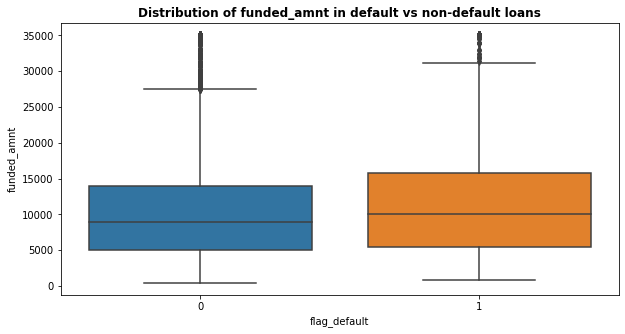

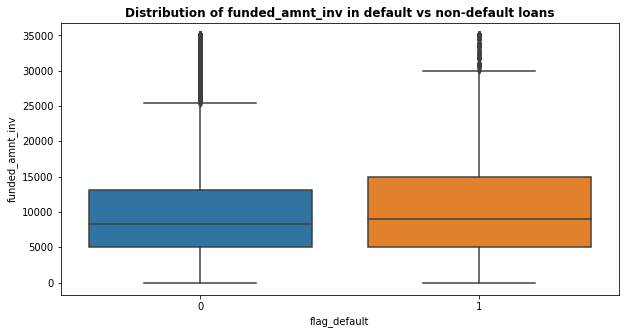

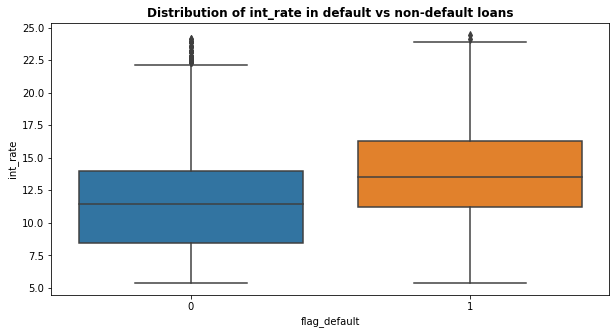

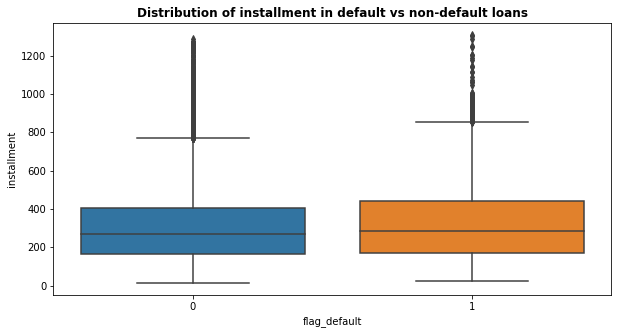

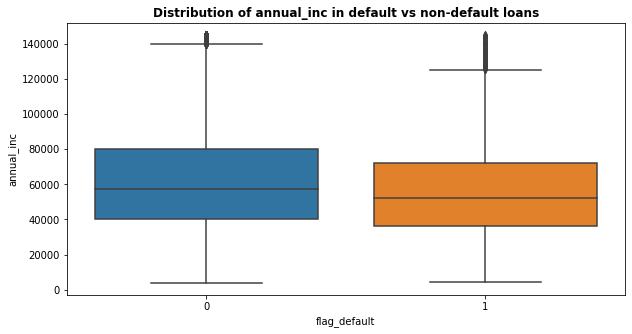

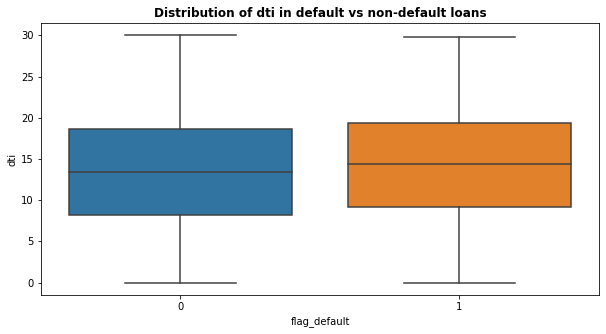

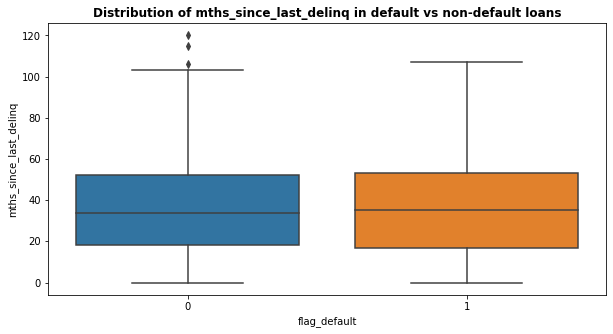

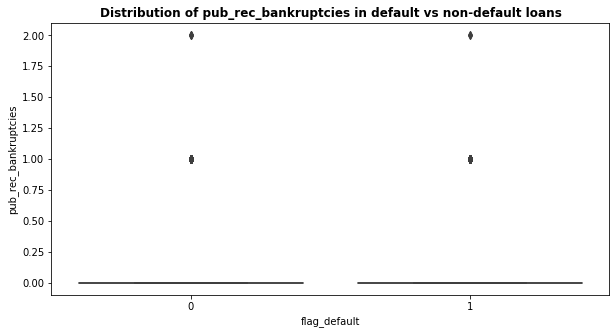

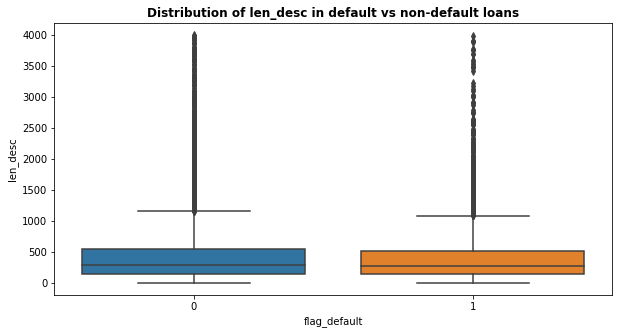

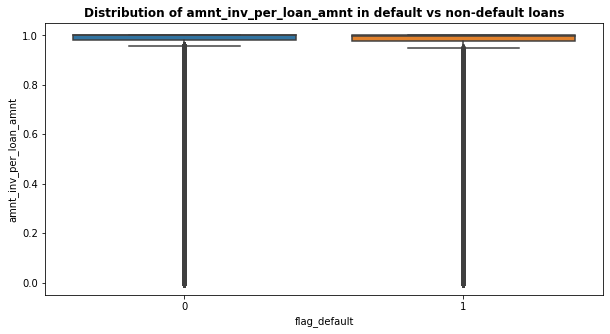

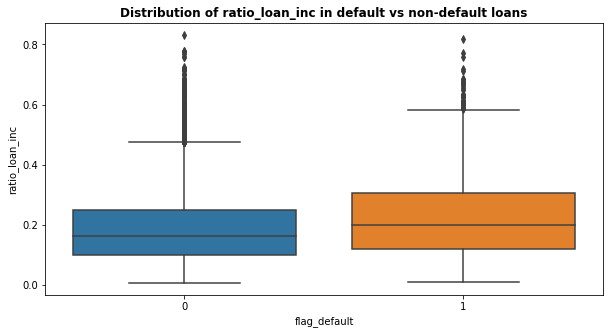

In [24]:
# Segemented analysis with respect to default rates for numerical variables
univariate_plots(df_loan,num_vars,"numeric","segmented univariate")

__Observations from below__:

Significant variables having an impact on default rates:
- Term - Default Rate is higher for term = 60 months
- Grade - As grade of the loan decreases default rate increases
- Purpose - Small business have higher default rates

Note:State NE has ~60% default rate.But since the number of loans from this state is neglible , not considering this as a significant variable

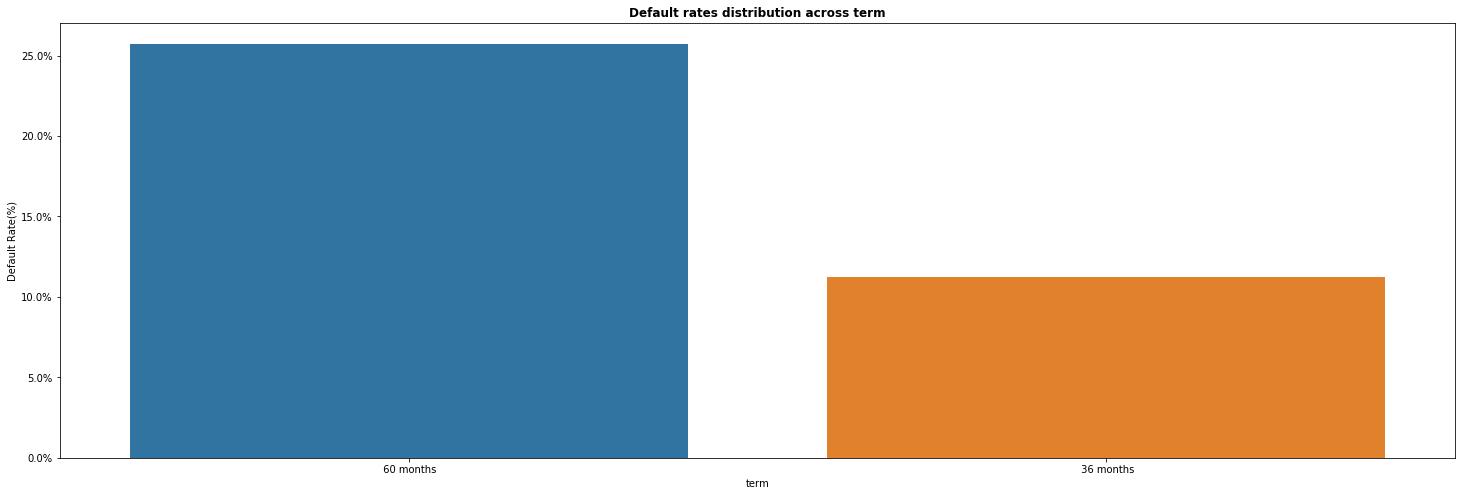

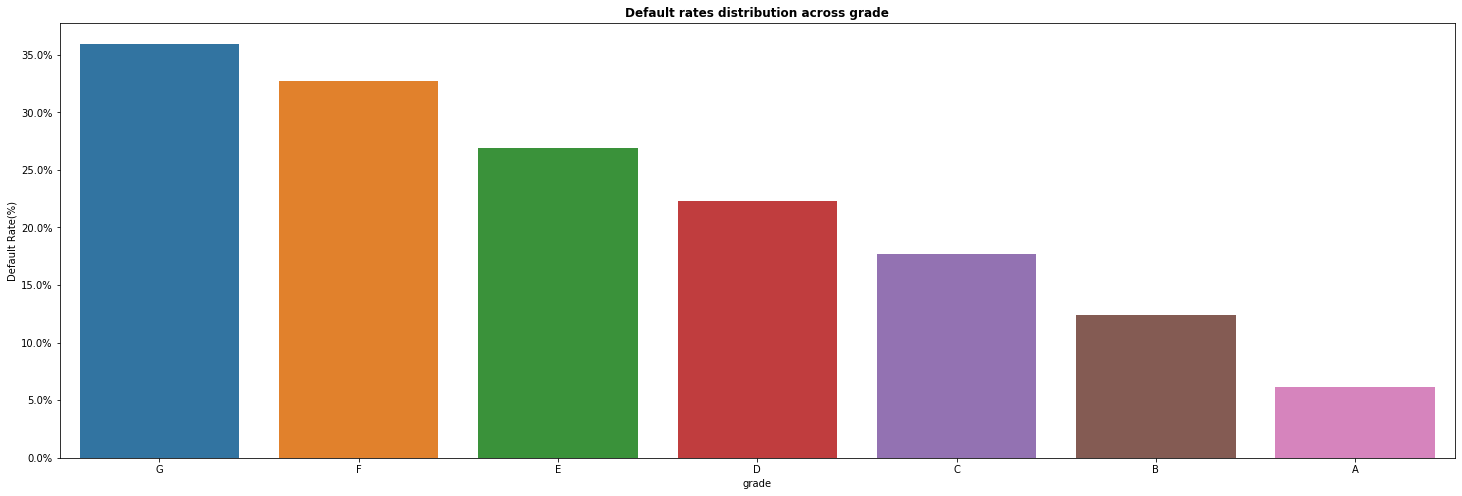

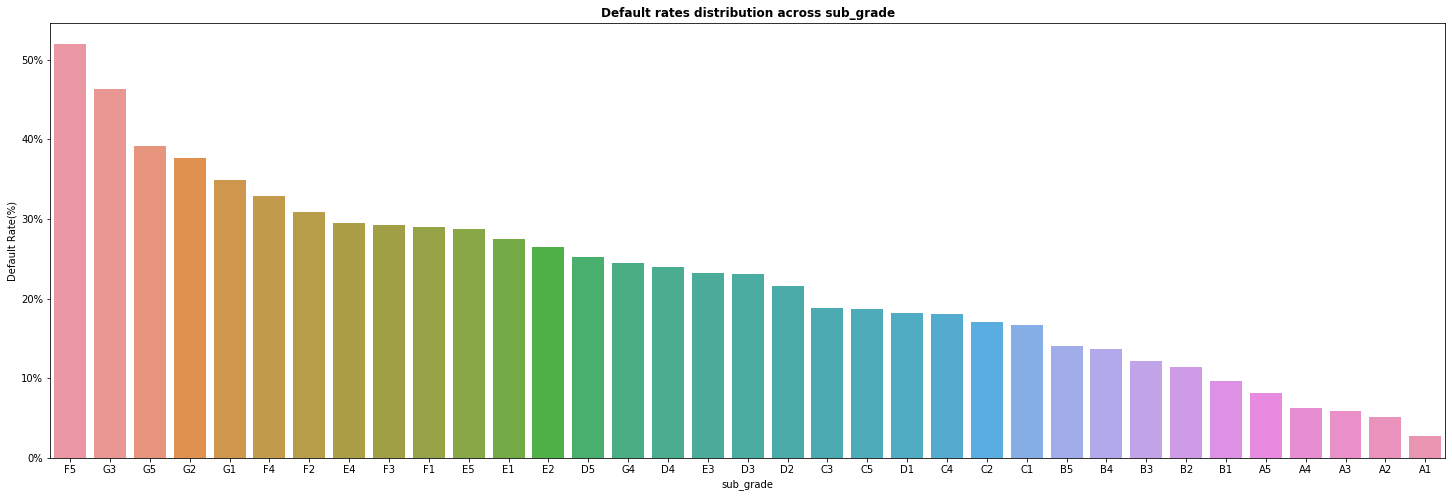

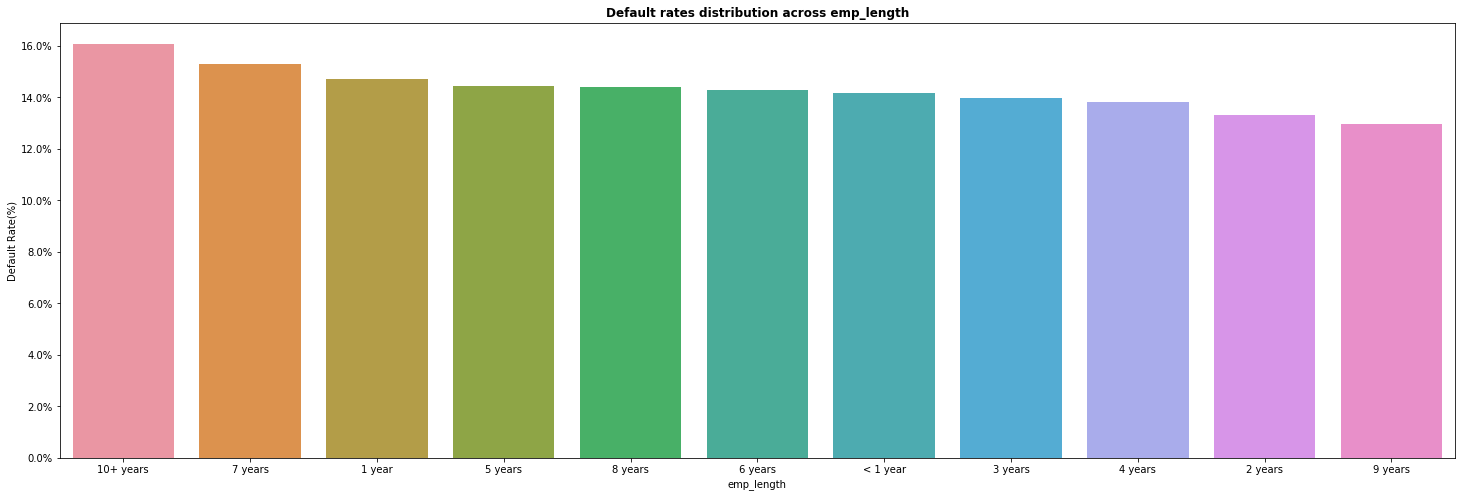

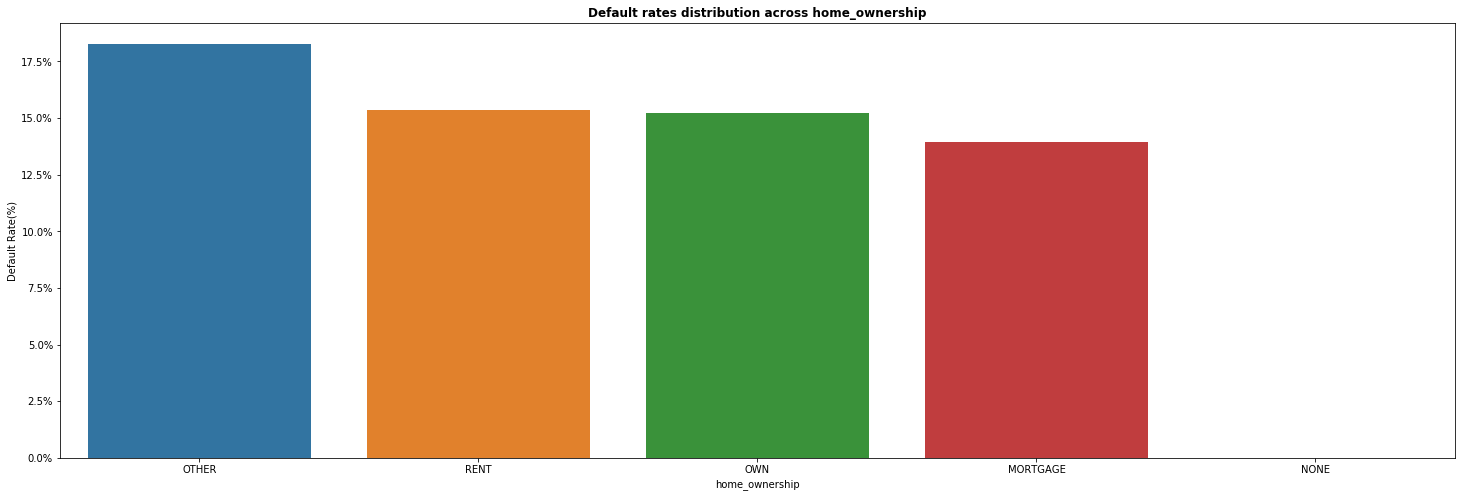

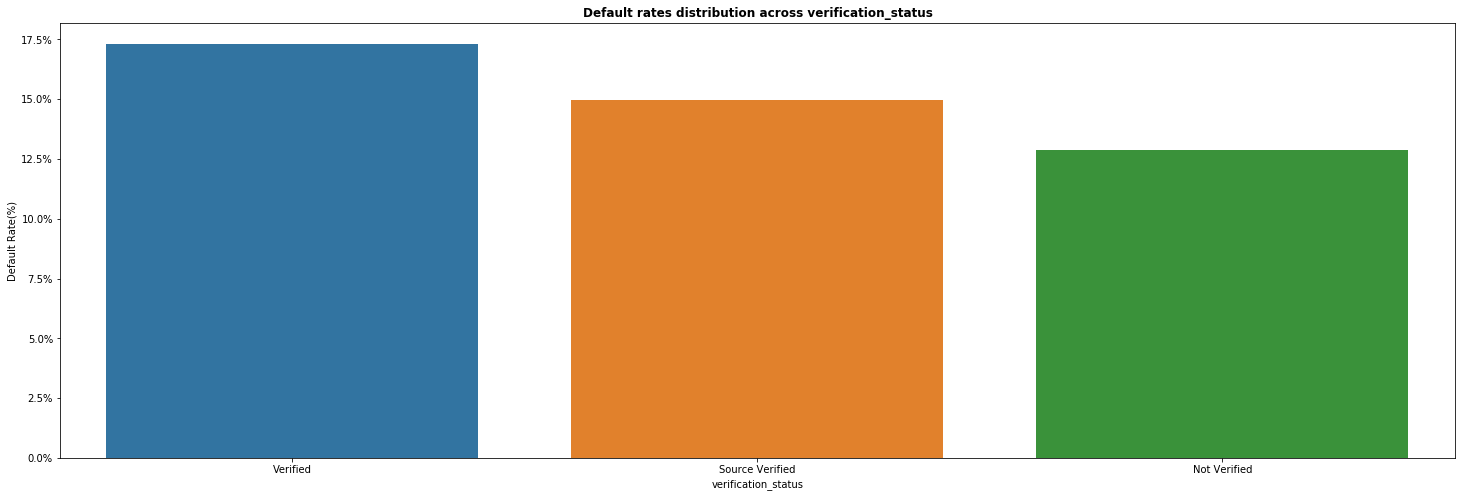

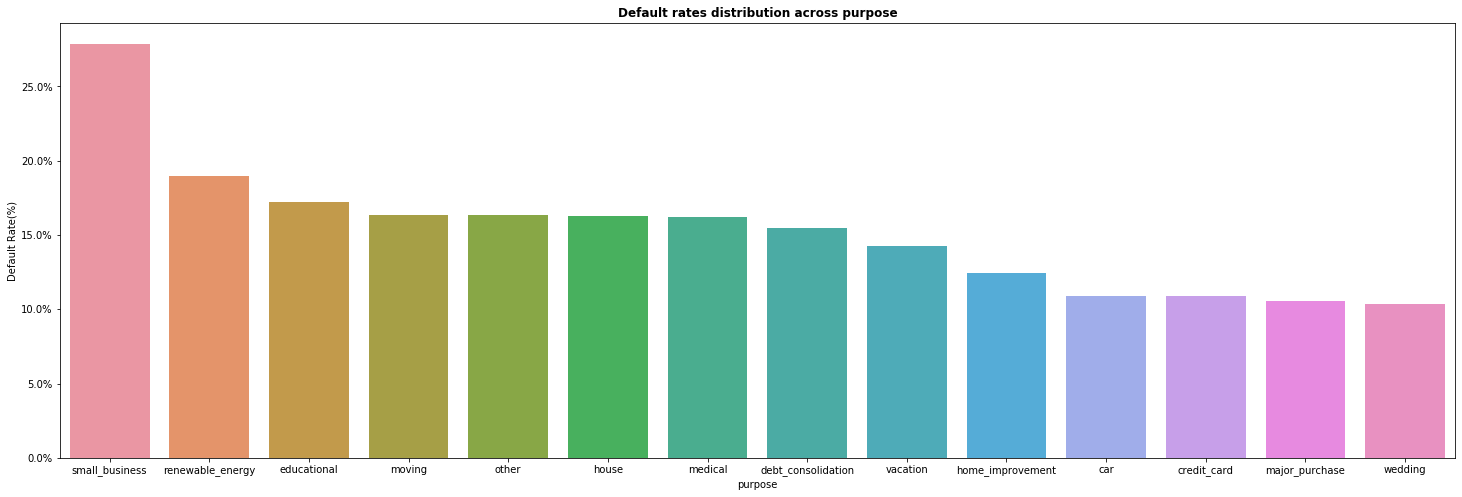

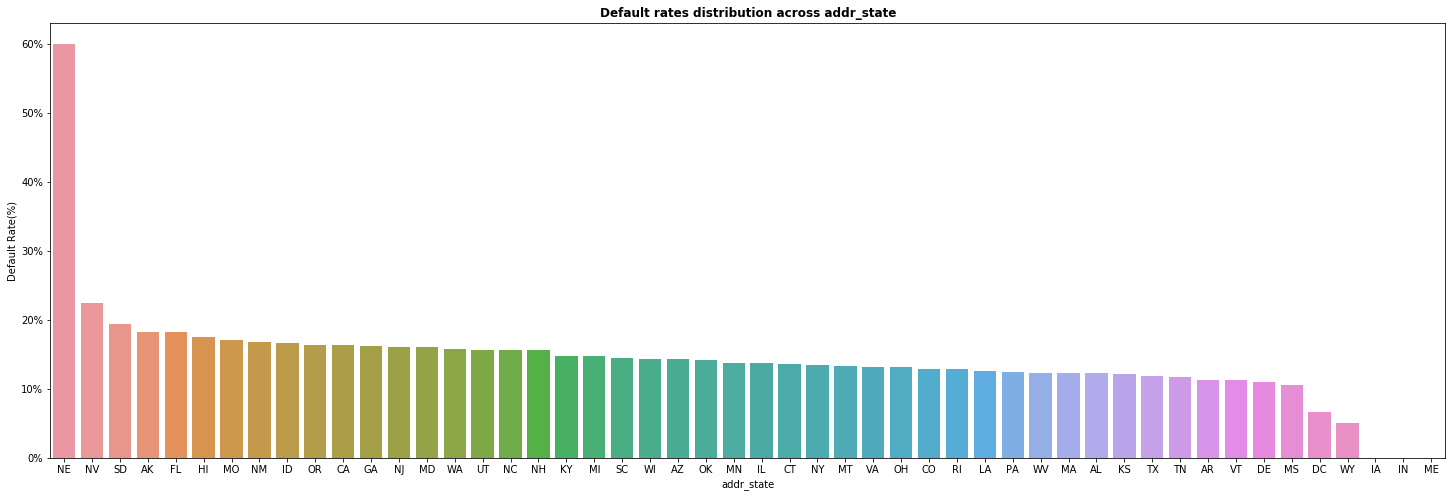

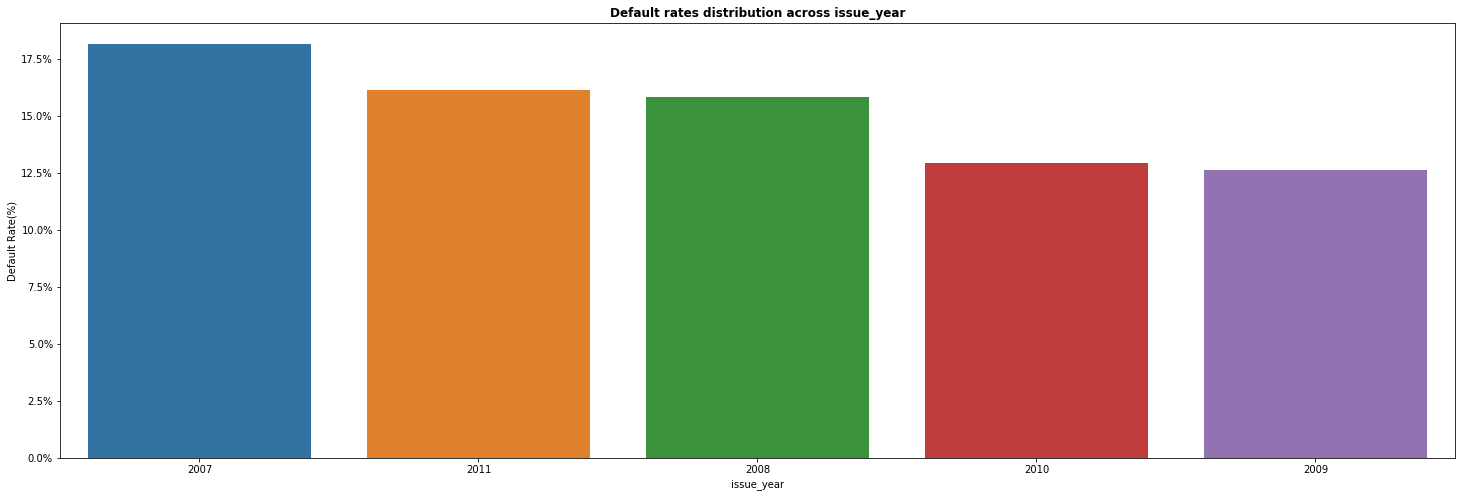

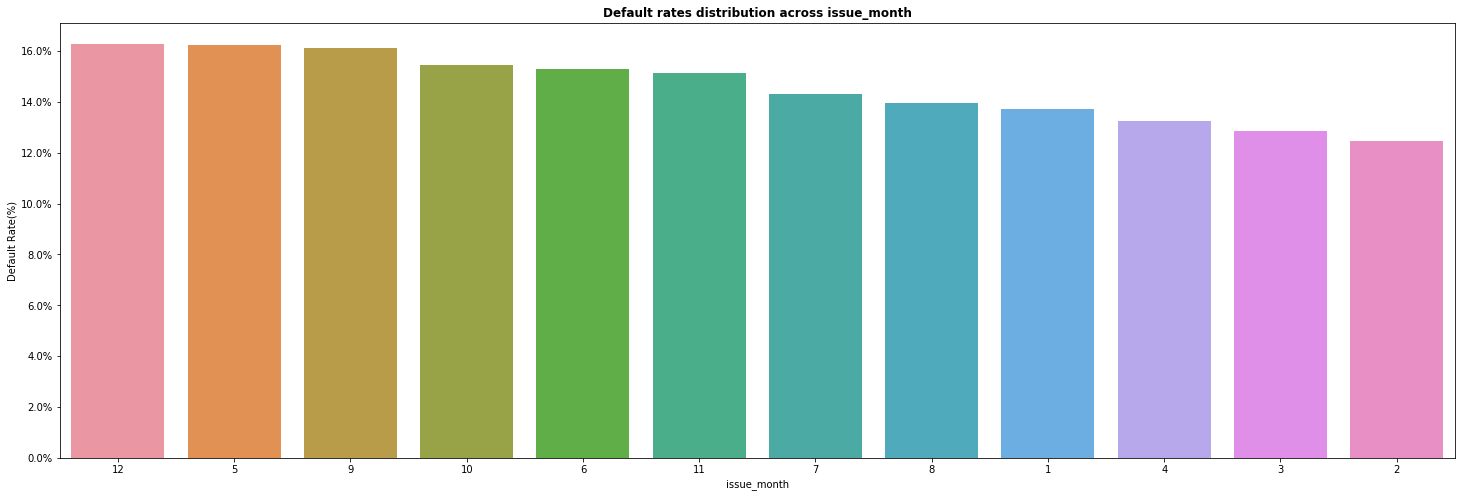

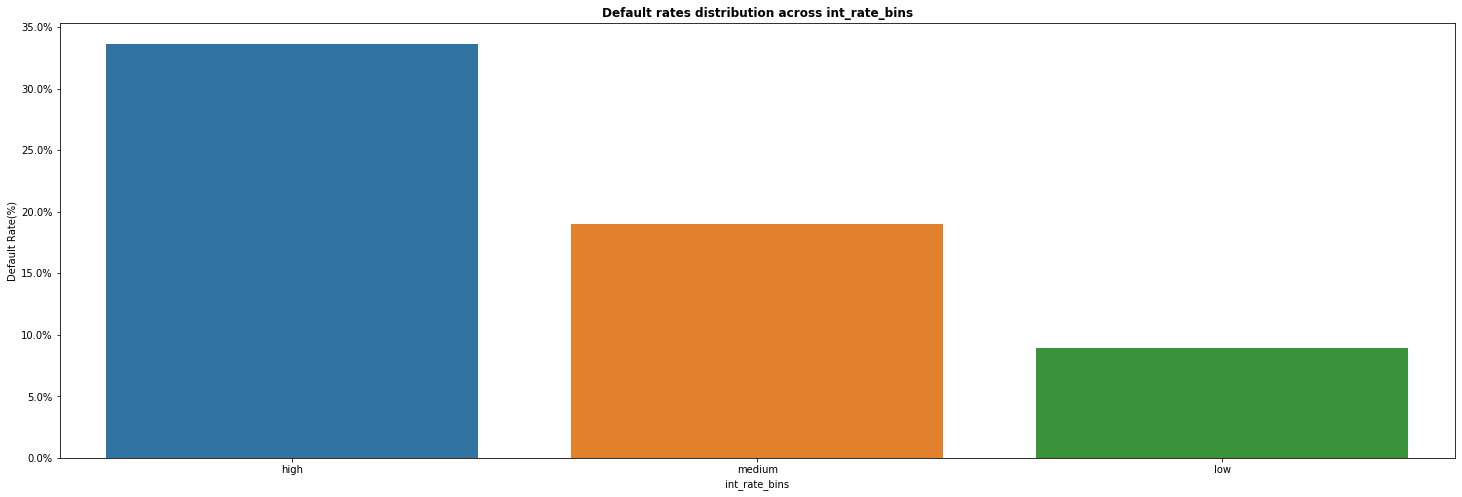

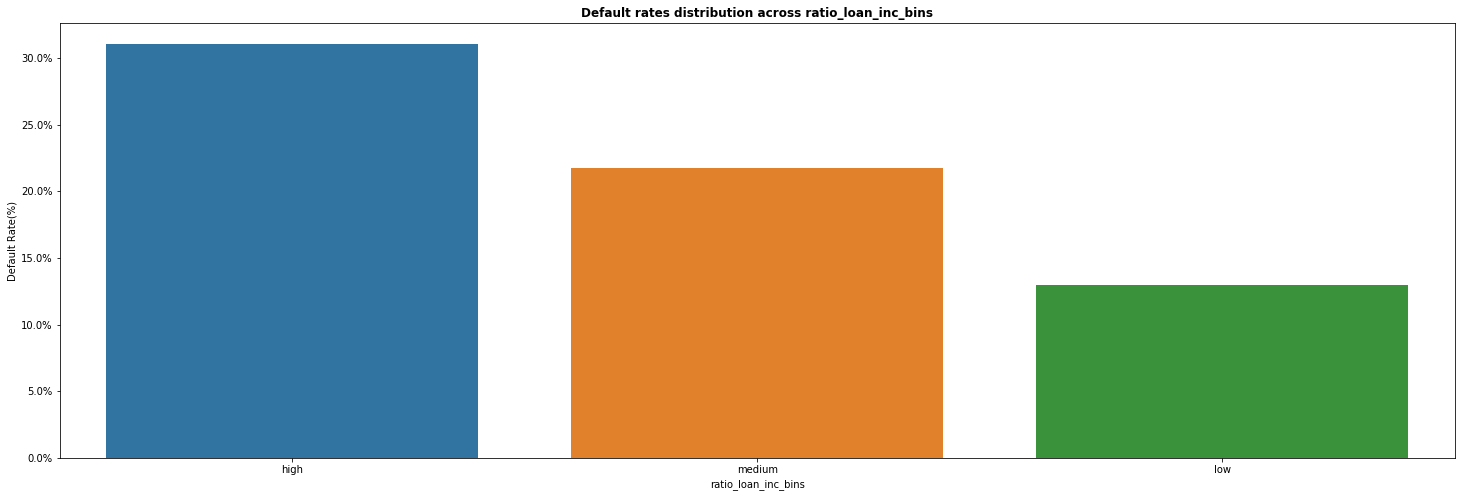

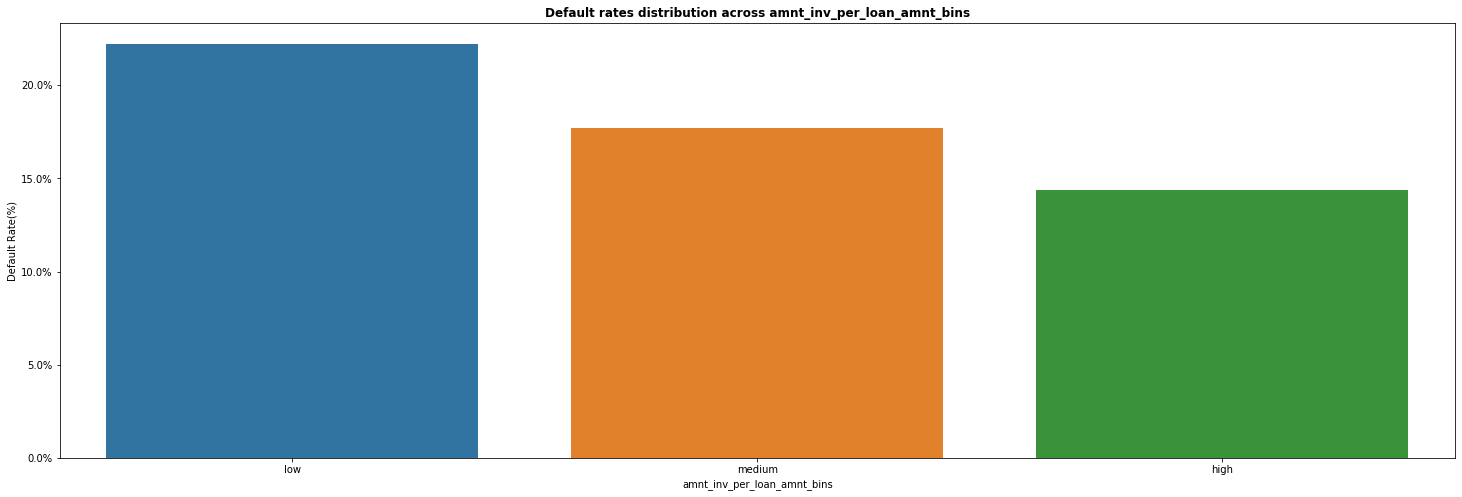

In [34]:
# Segemented analysis with respect to default rates for numerical variables
univariate_plots(df_loan,cat_vars,"categorical","segmented univariate")

In [26]:
sig_vars=[]

# Bivariate Analysis

__Observations from below__

- The variables loan_amnt,funded_amnt and funded_amnt_inv are highly orrelated.Hence considering one of this variables would be suffecient.

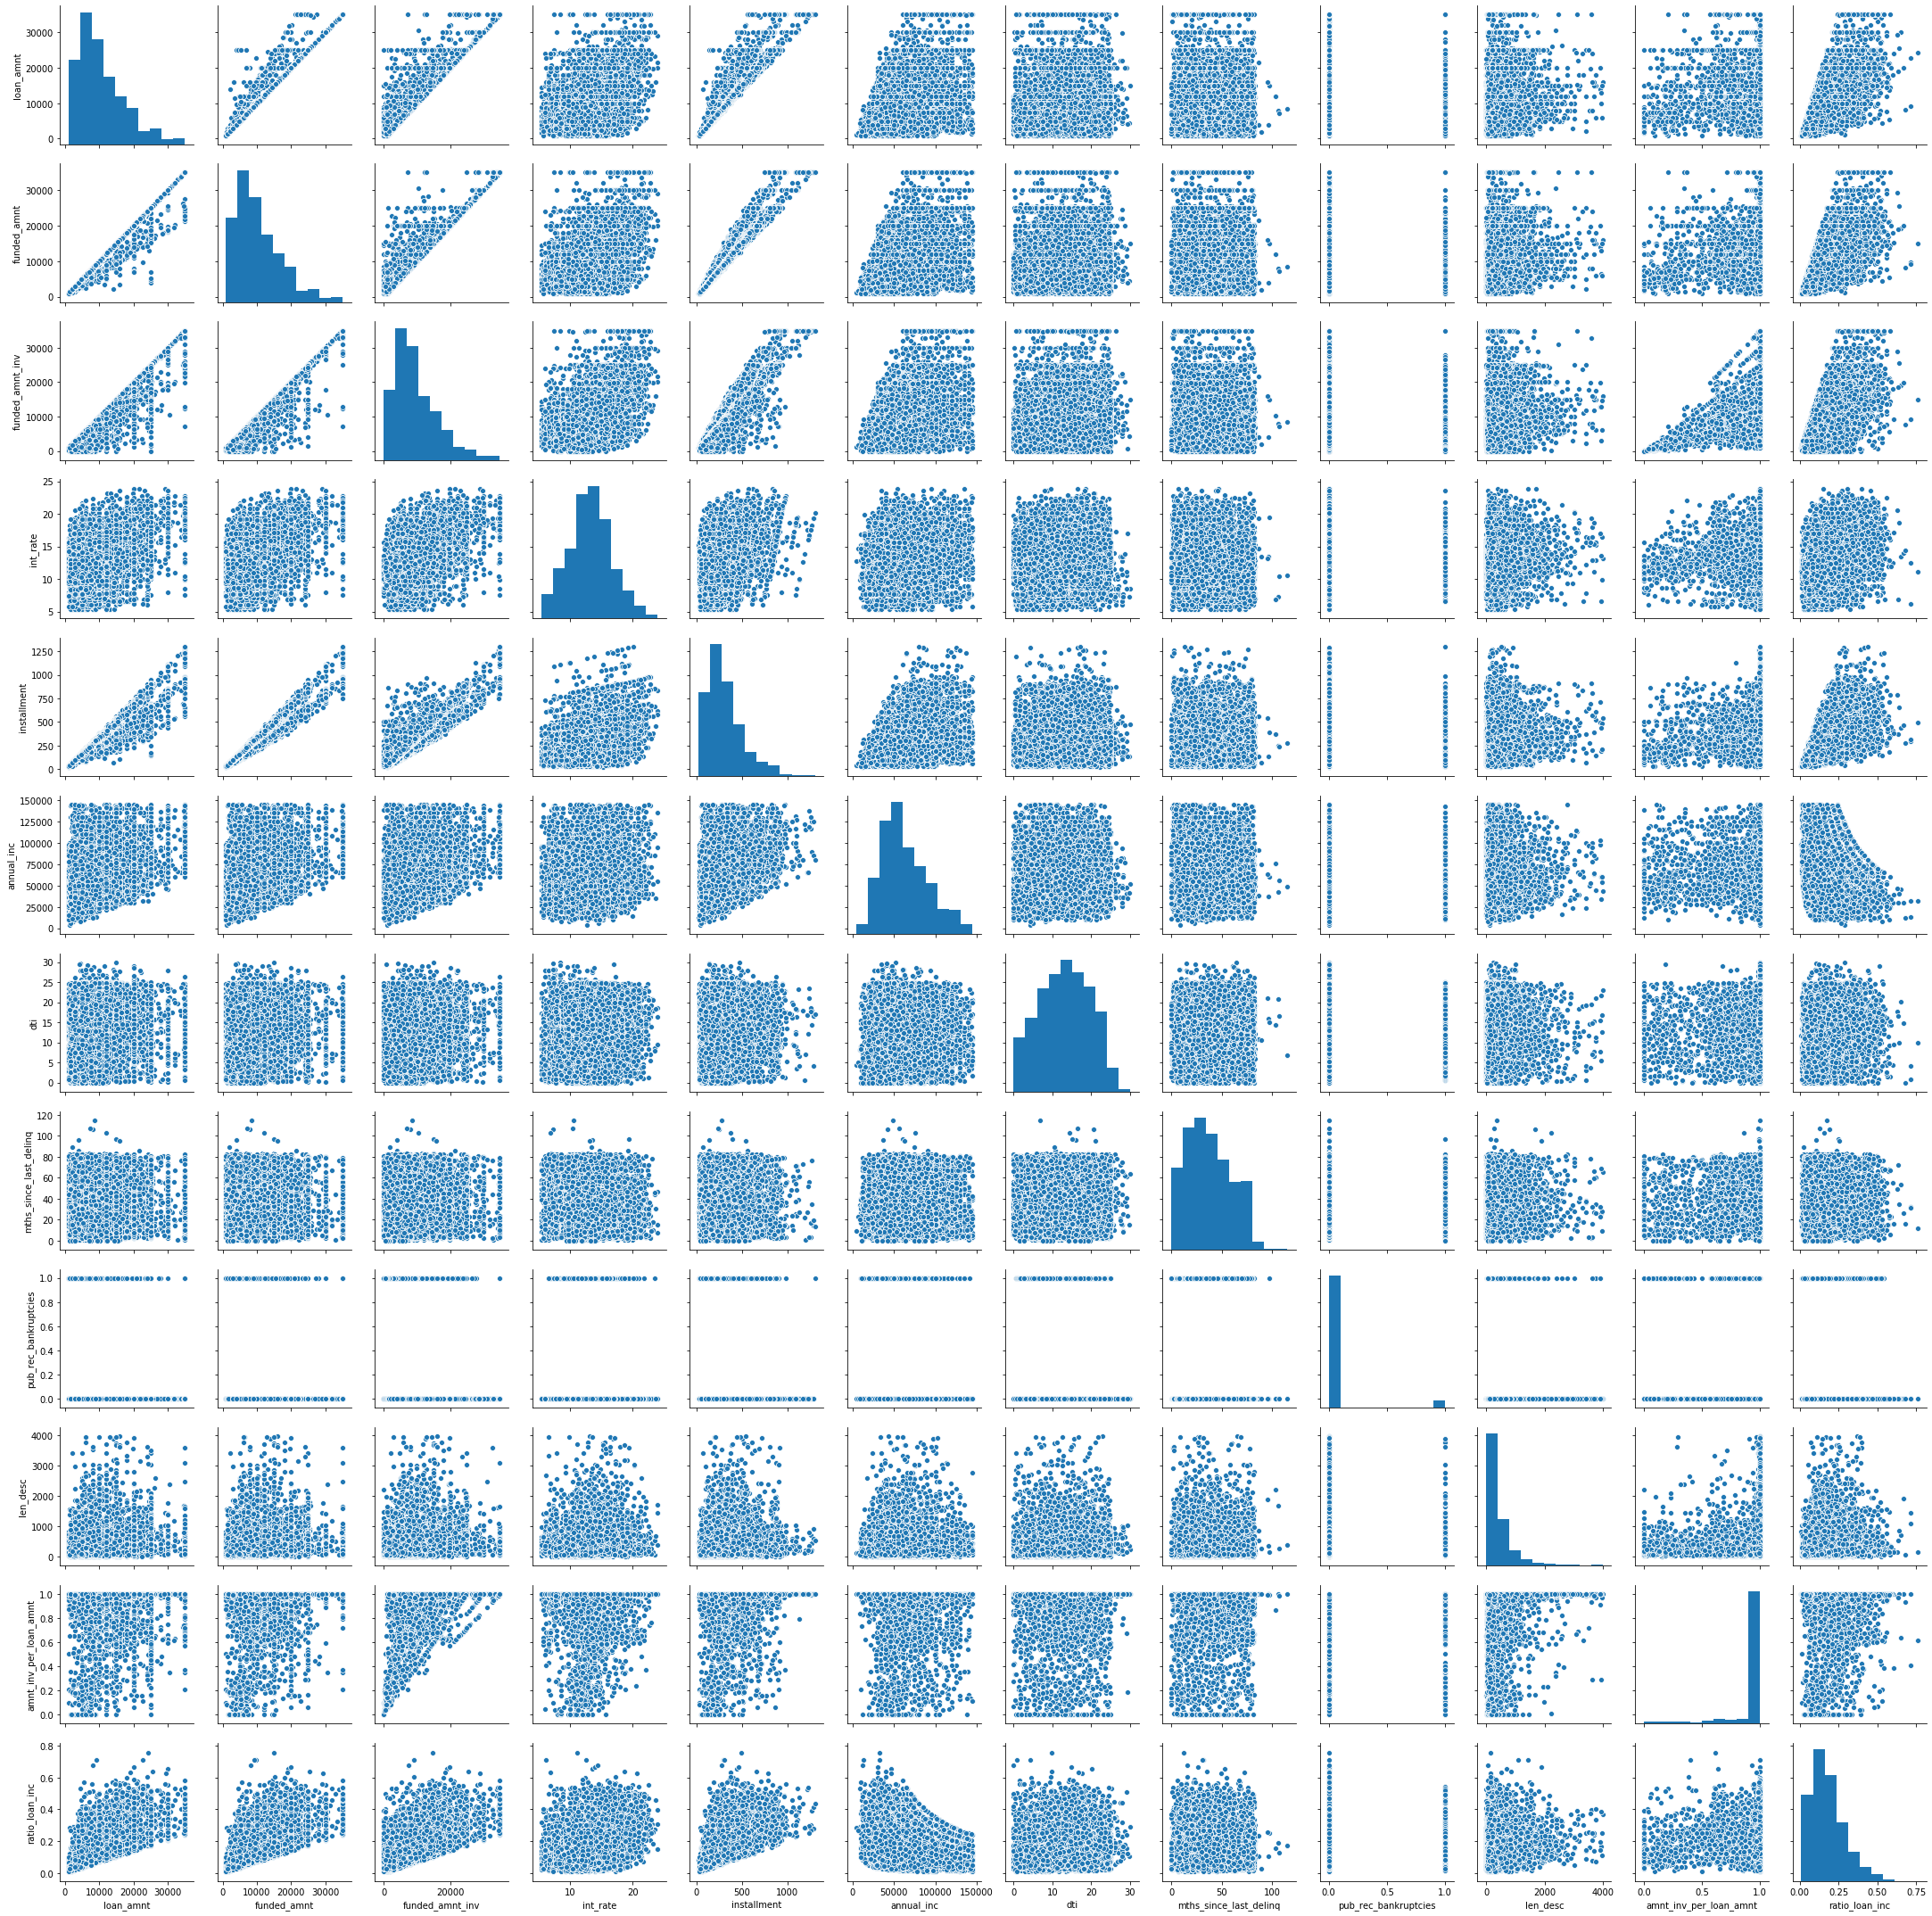

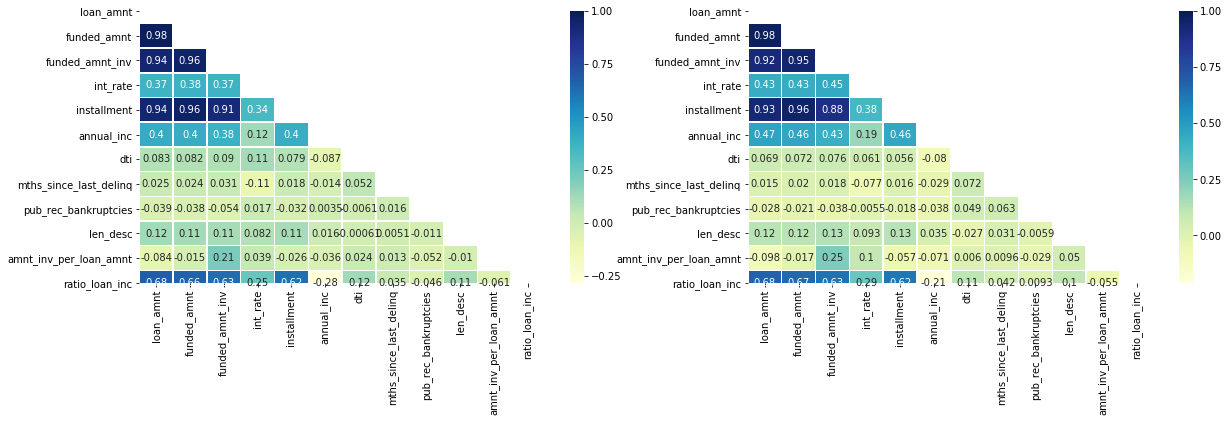

In [27]:
# Bivariate analysis for numeric variables
bivariate_plots(df_loan,num_vars,num_vars,"numeric","numeric")

__Observations from below__

- The interest rate increases for higher term
- Purposes : Small business,debt consolidation and house have higher interest rate
- The above purposes have a higher interest ratio as well
- The lower grades have higher loan to income ratio

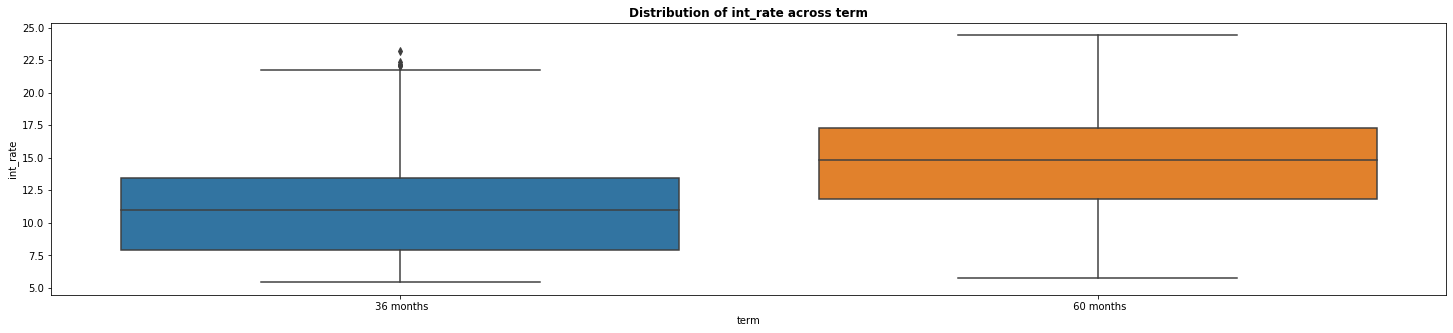

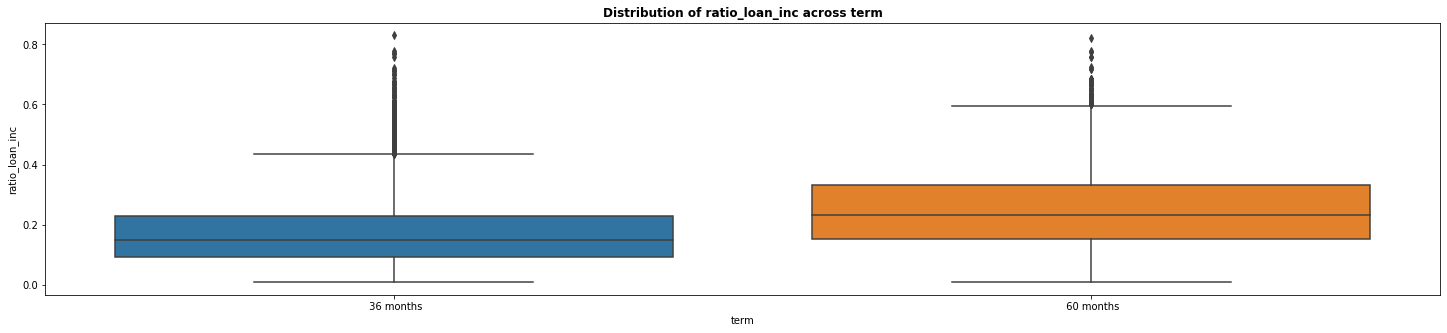

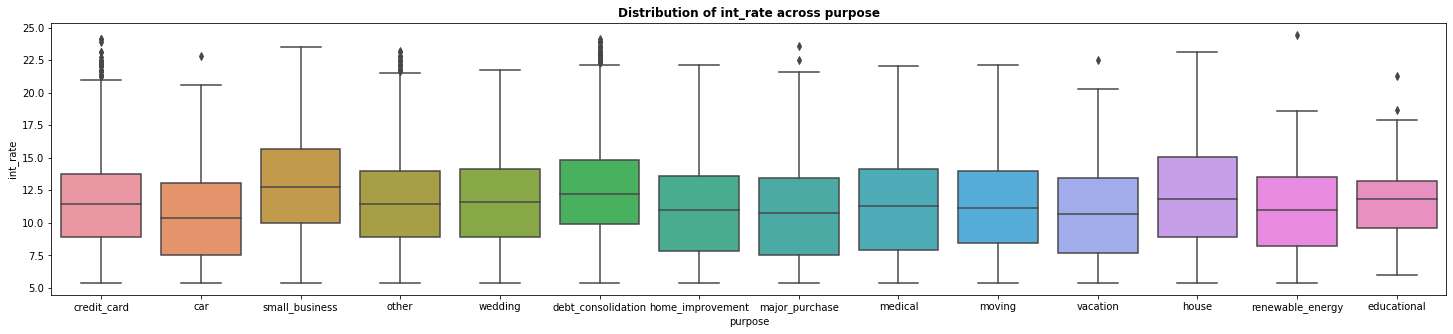

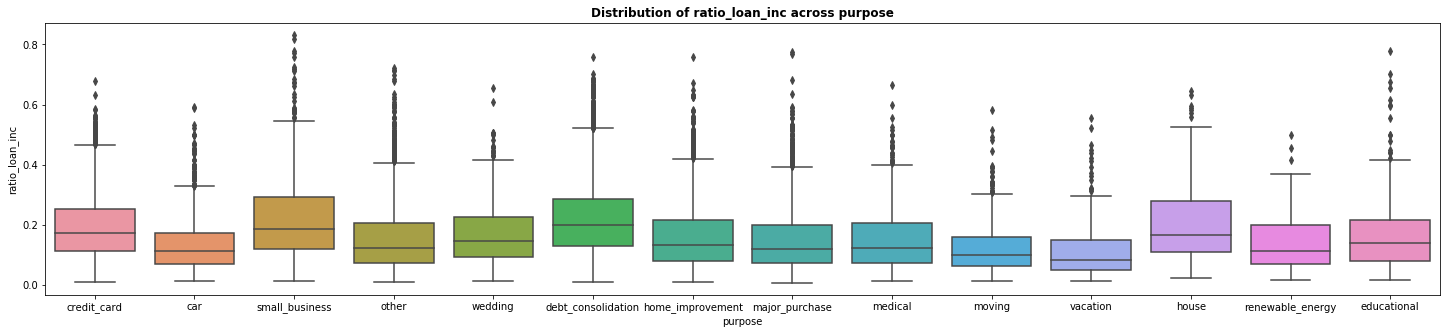

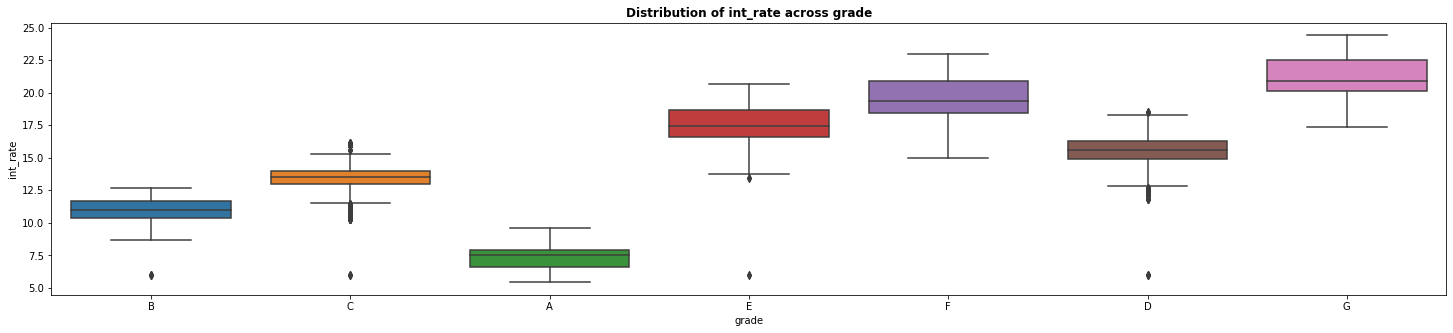

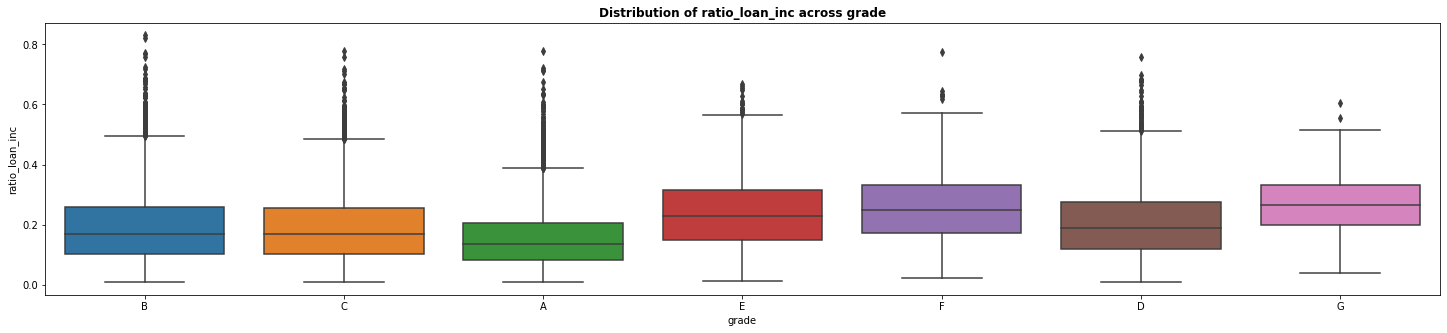

In [28]:
# Bivariate analysis only for significant numerical and categorical variables
bivariate_plots(df_loan,["int_rate","ratio_loan_inc"],["term","purpose","grade"],"numeric","categorical")

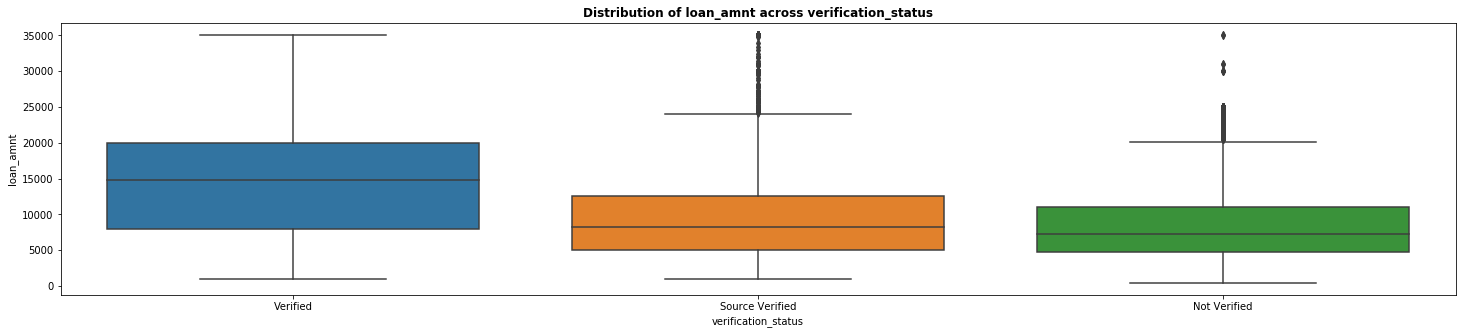

In [75]:
bivariate_plots(df_loan,["loan_amnt"],["verification_status"],"numeric","categorical")

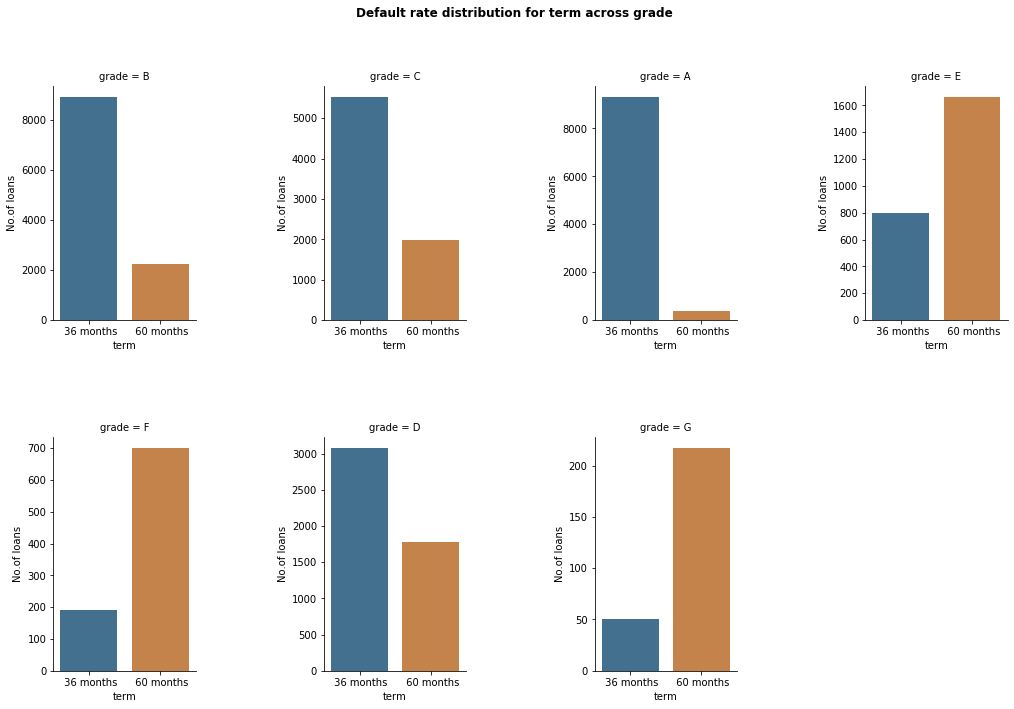

In [51]:
## Bivariate plots for categorical and categorical variables
#Relationship between term and grades
bivariate_plots(df_loan,["term"],["grade"],"categorical","categorical")

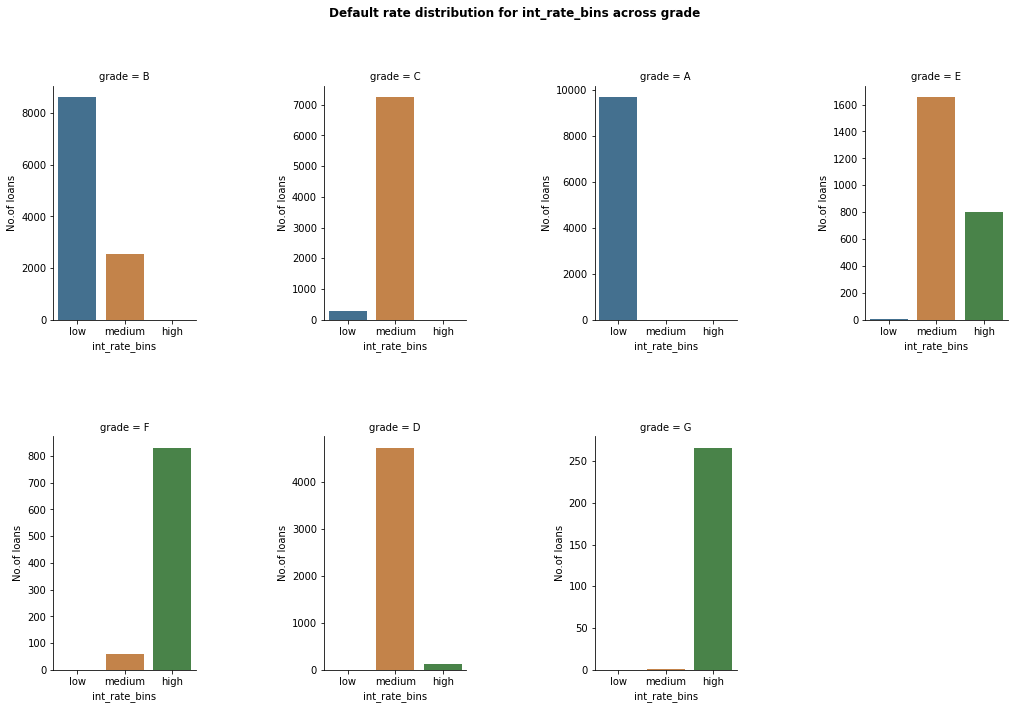

In [52]:
## Bivariate plots for categorical and categorical variables
#Relationship between interest rates and grades
bivariate_plots(df_loan,["int_rate_bins"],["grade"],"categorical","categorical")

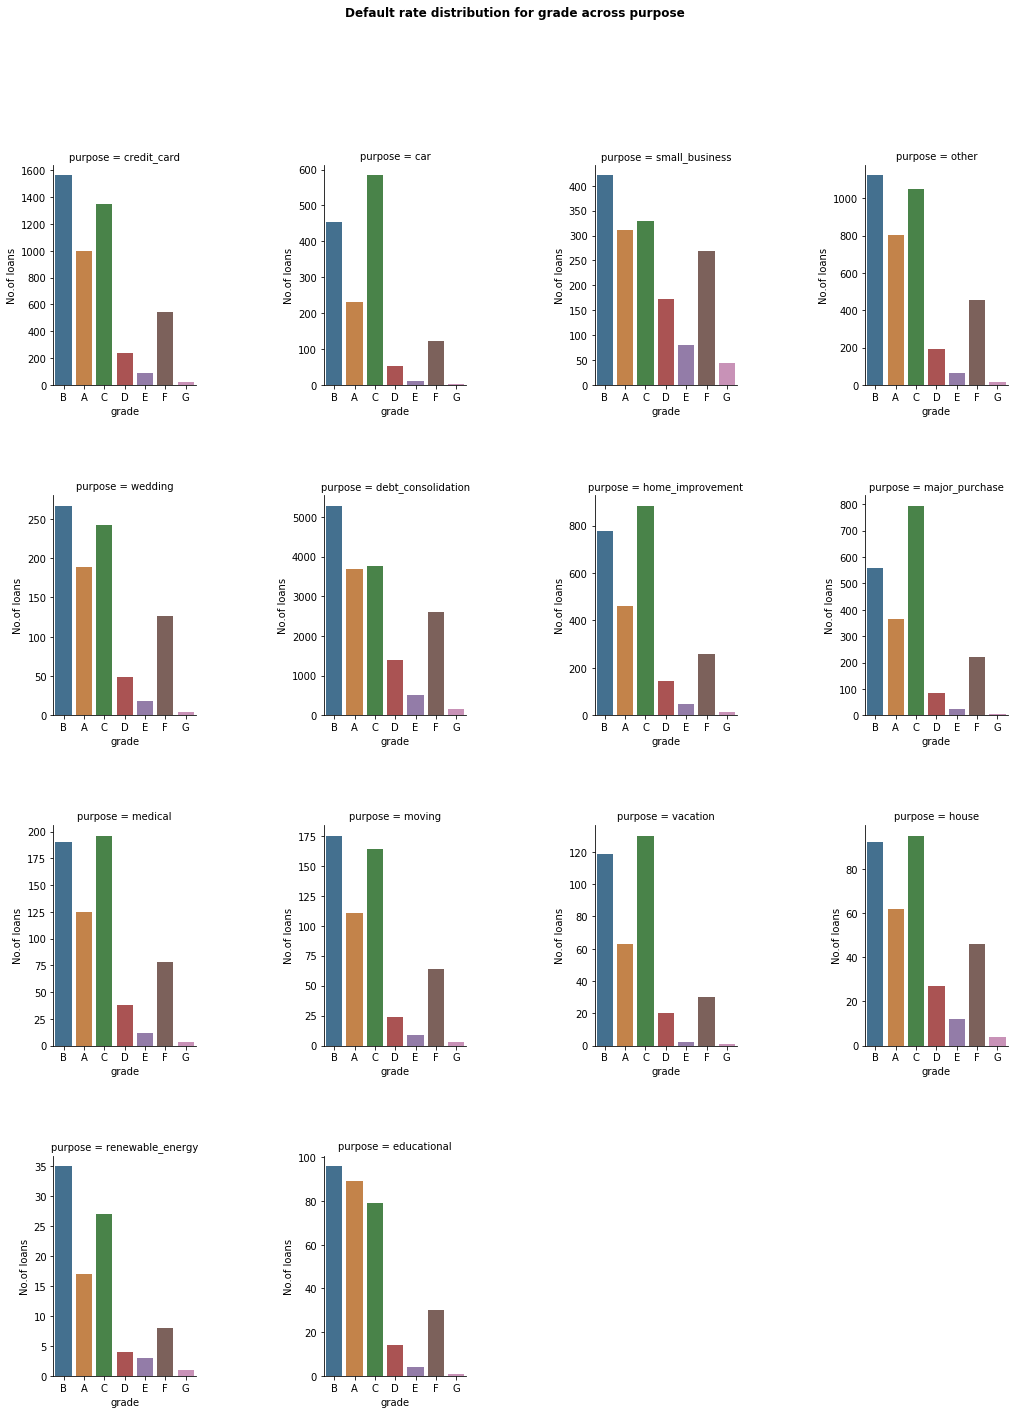

In [55]:
## Bivariate plots for categorical and categorical variables
#Relationship between purpose and grades
bivariate_plots(df_loan,["grade"],["purpose"],"categorical","categorical")

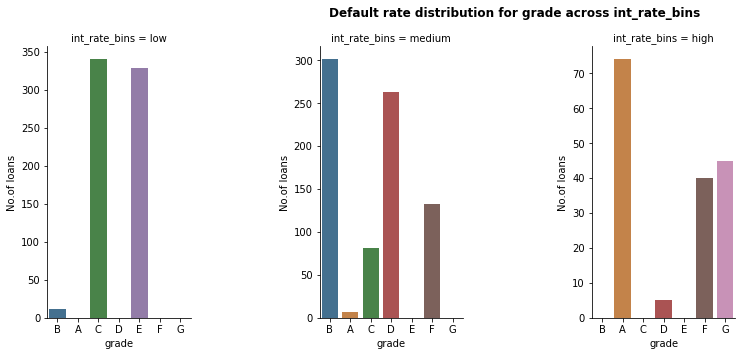

In [81]:
# Bivariate plots for categorical and categorical variables
bivariate_plots(df_loan[df_loan["purpose"]=="small_business"],["grade"],["int_rate_bins"],"categorical","categorical")

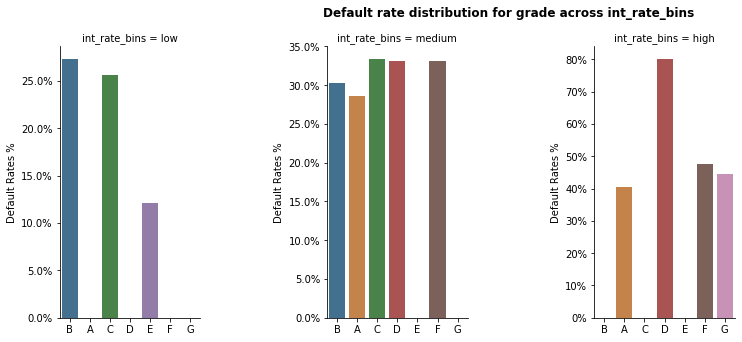

In [82]:
multivariate_plots(df_loan[df_loan["purpose"]=="small_business"],["grade"],["int_rate_bins"])

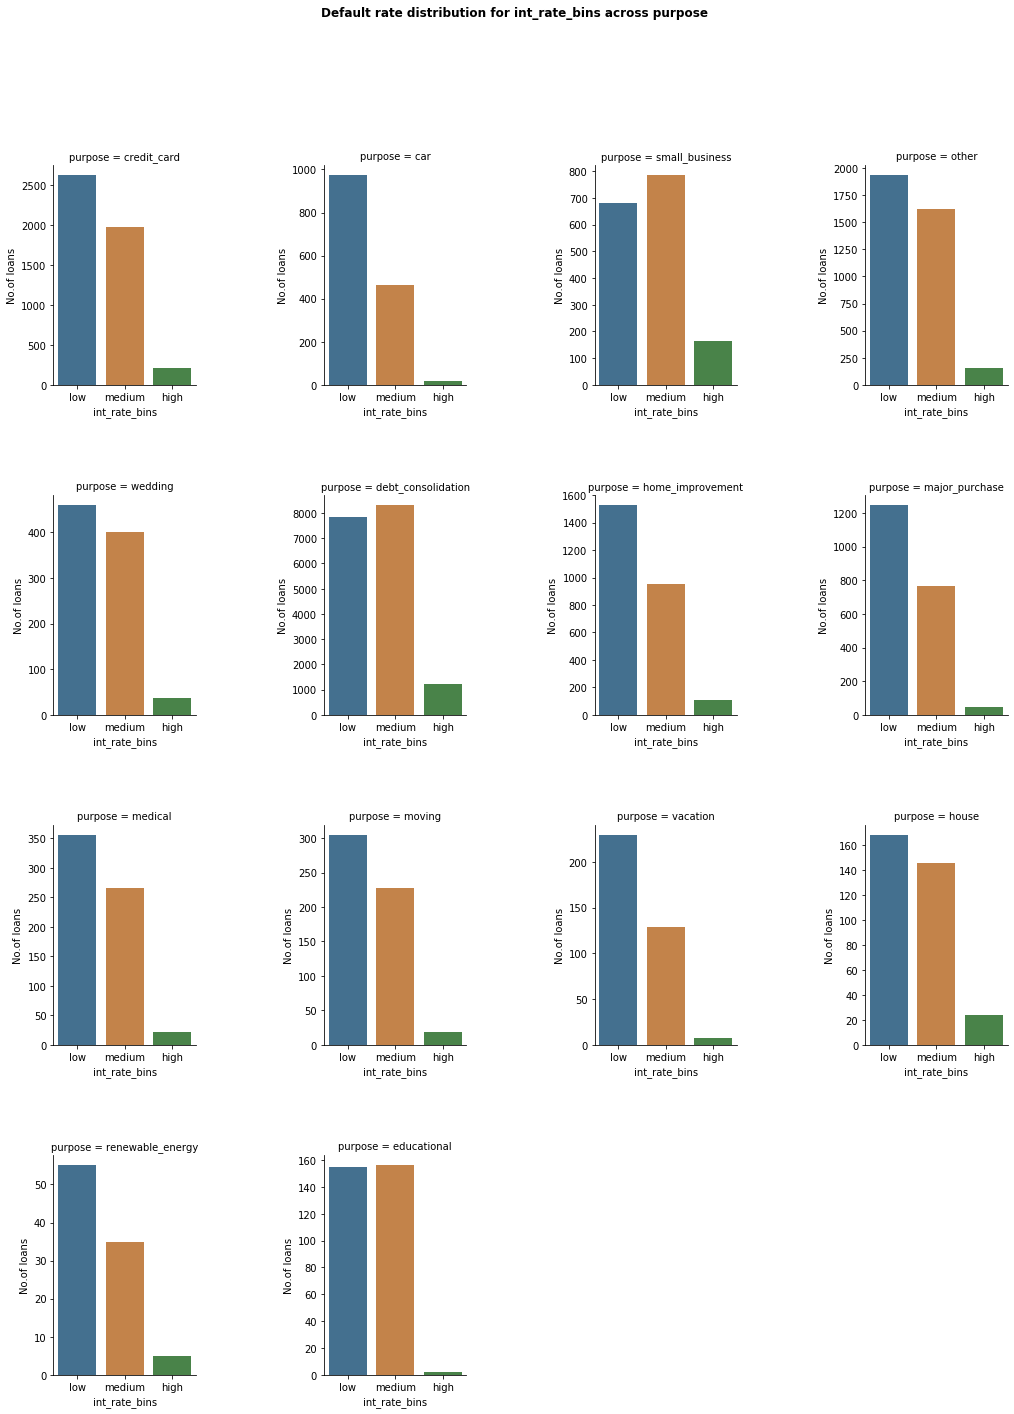

In [57]:
## Bivariate plots for categorical and categorical variables
bivariate_plots(df_loan,["int_rate_bins"],["purpose"],"categorical","categorical")

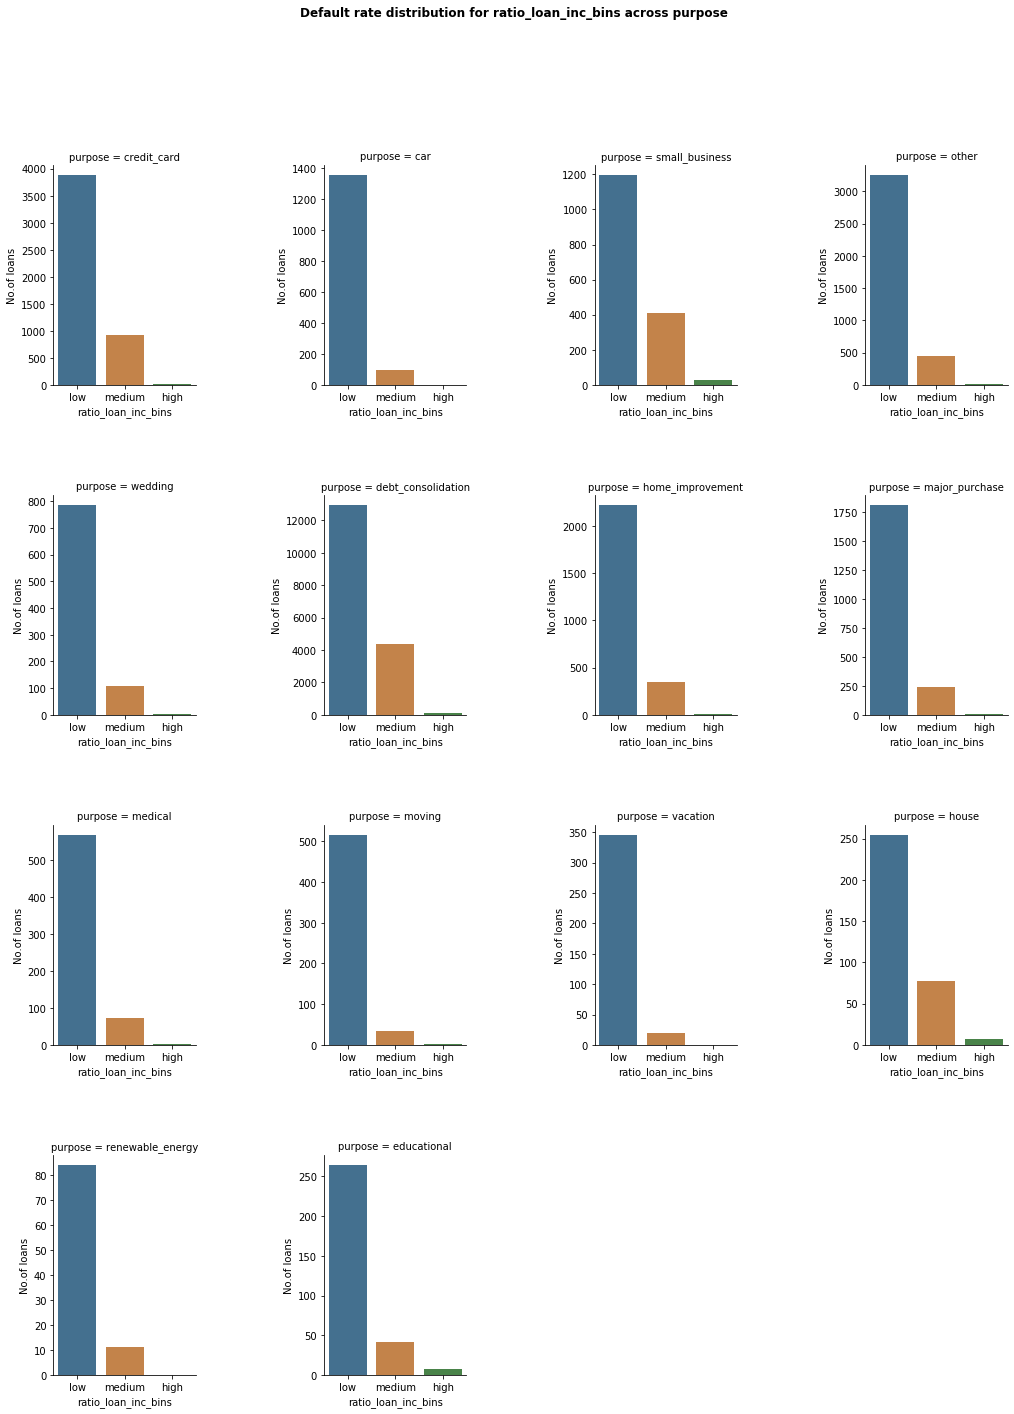

In [70]:
bivariate_plots(df_loan,["ratio_loan_inc_bins"],["purpose"],"categorical","categorical")

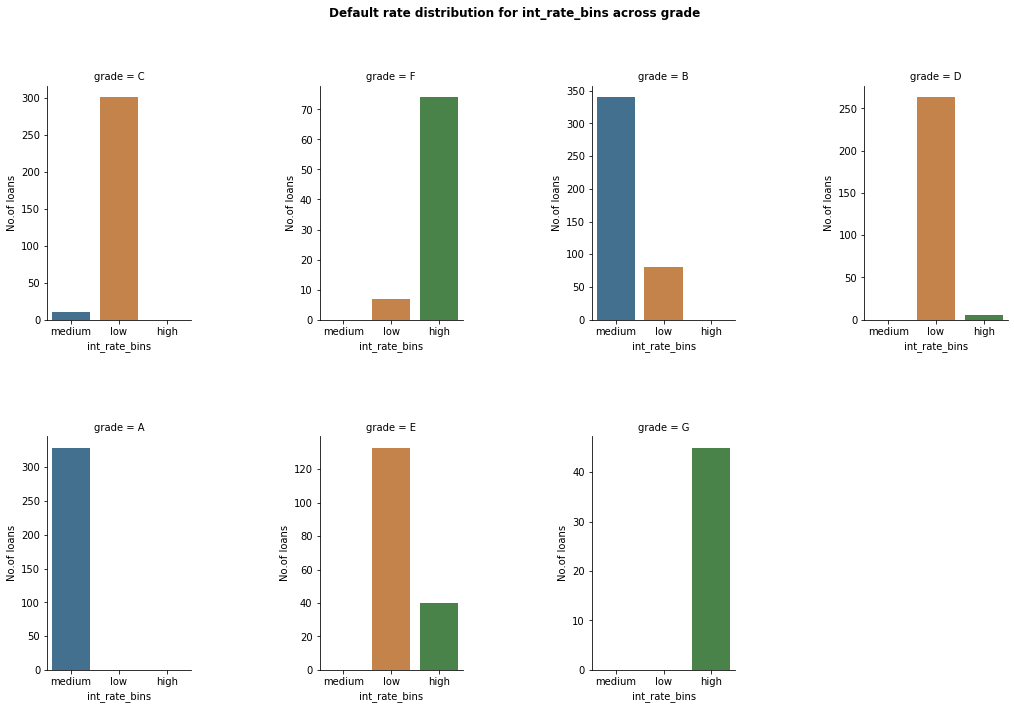

In [61]:
bivariate_plots(df_loan[df_loan["purpose"]=='small_business'],["int_rate_bins"],["grade"],"categorical","categorical")

# Multivariate Analysis

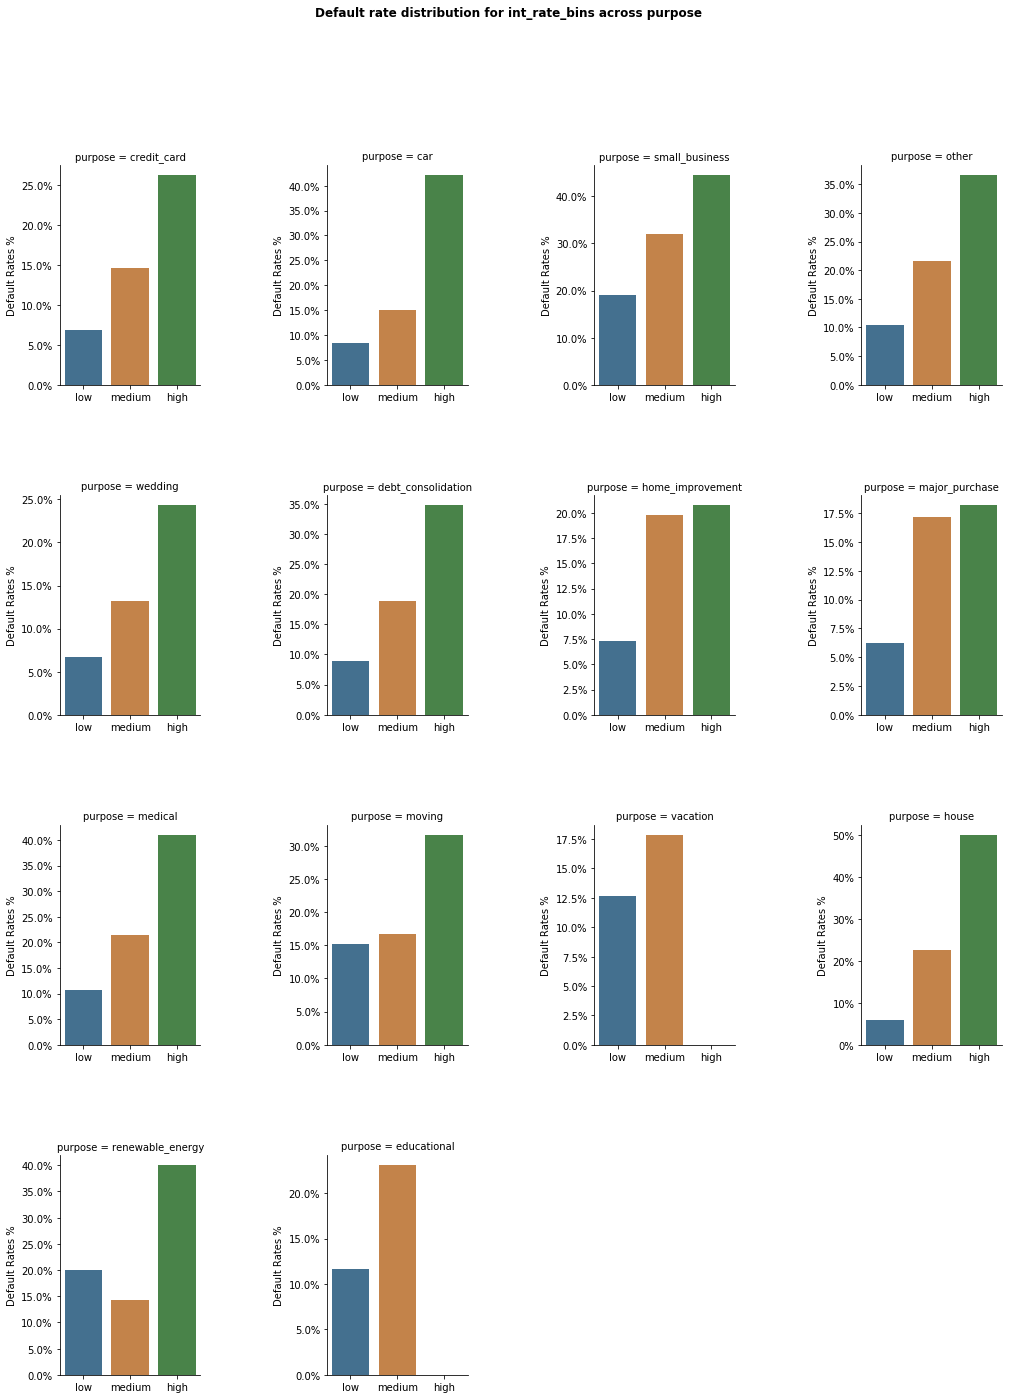

In [56]:
multivariate_plots(df_loan,["int_rate_bins"],["purpose"])

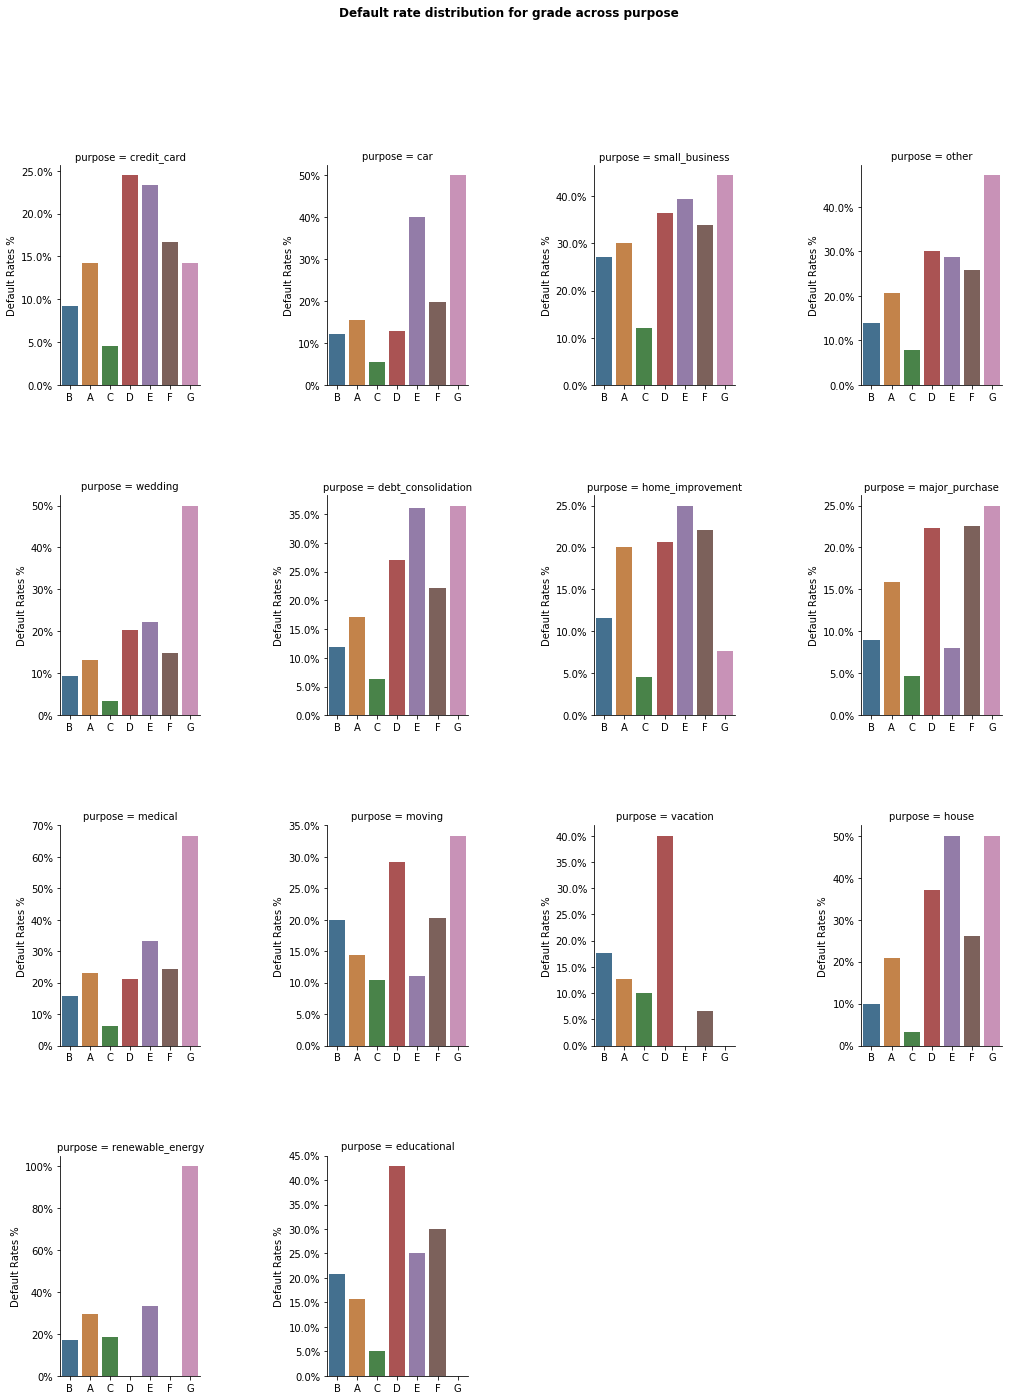

In [54]:
multivariate_plots(df_loan,["grade"],["purpose"])

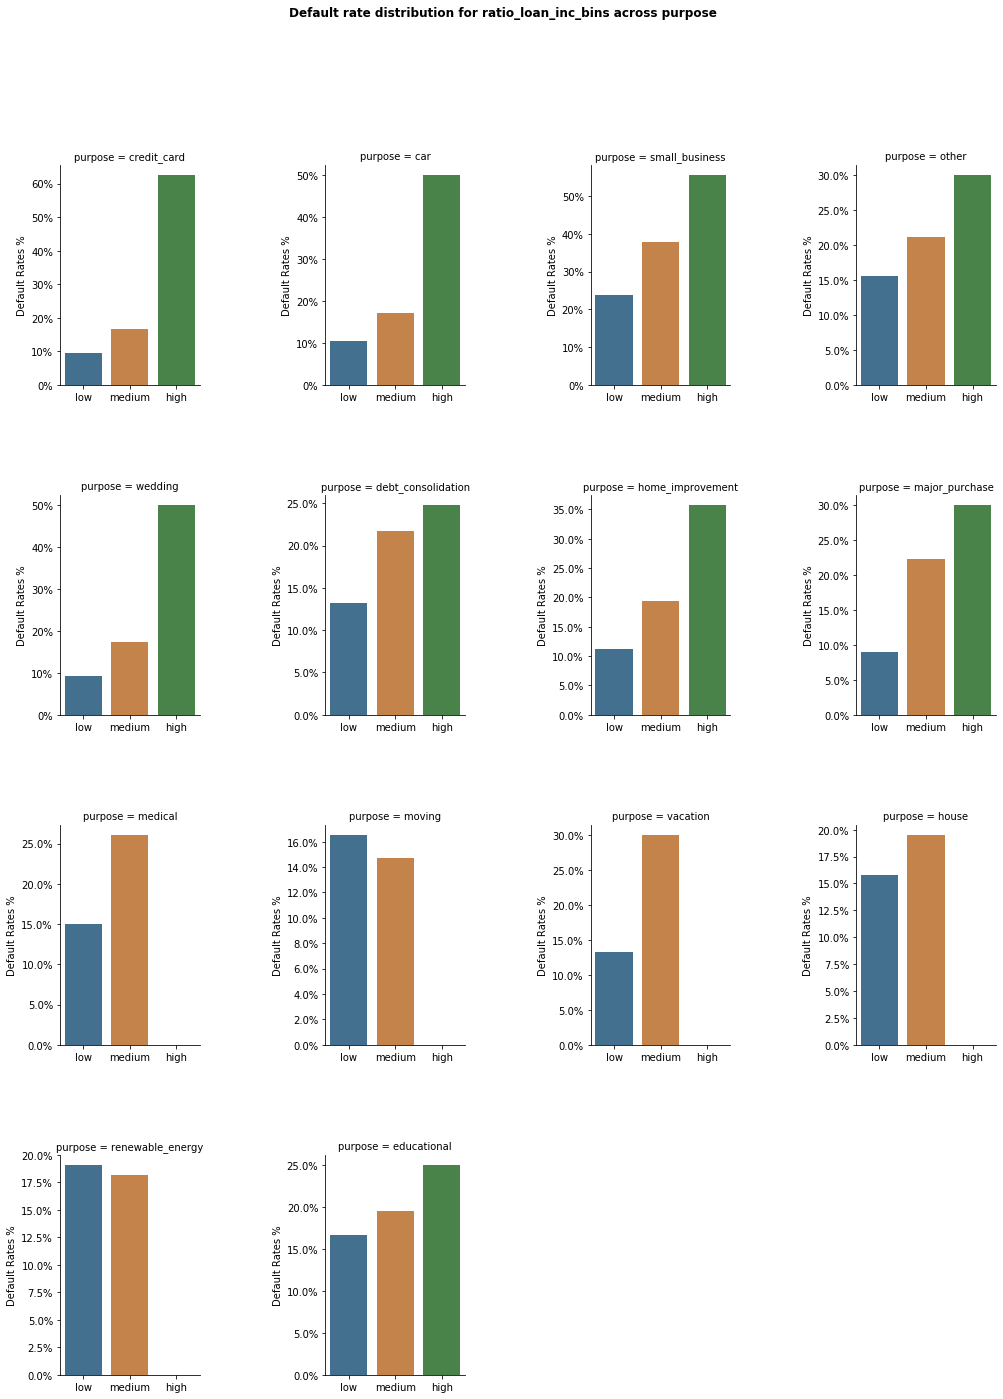

In [68]:
multivariate_plots(df_loan,["ratio_loan_inc_bins"],["purpose"])

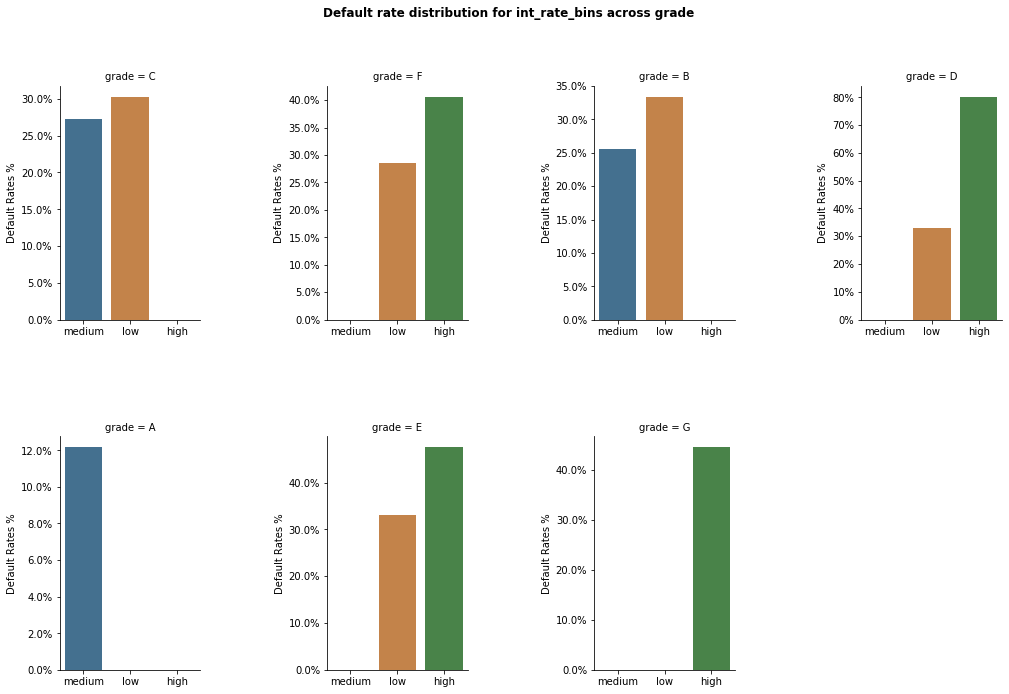

In [59]:
multivariate_plots(df_loan[df_loan["purpose"]=='small_business'],["int_rate_bins"],["grade"])

Other Analysis

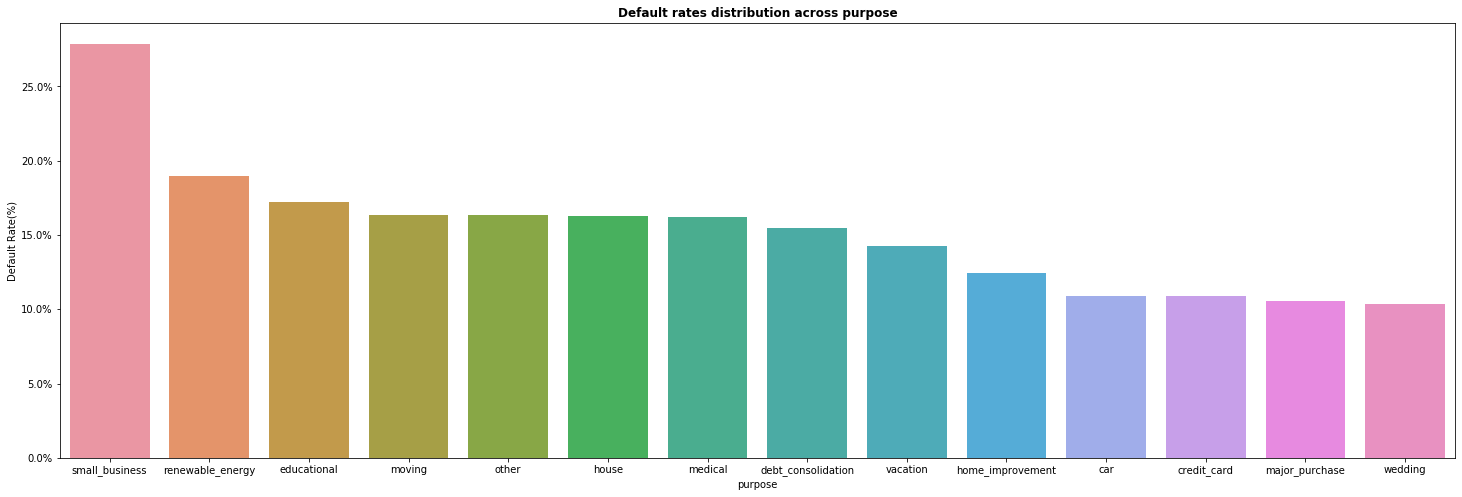

In [44]:
var_desc_order=(df_loan.loc[df_loan['flag_default']==1,"purpose"].value_counts()/df_loan.loc[:,"purpose"].value_counts()).sort_values(ascending=False).index
f, axes=plt.subplots(nrows =1,ncols=1,figsize=(25,8))
axes.set_title("Default rates distribution across {}".format("purpose"),weight='bold')
sns.barplot(x=df_loan["purpose"].dropna(),y=df_loan['flag_default'],order=var_desc_order,ci=None).set(xlabel="purpose", ylabel = "Default Rate(%)")    
axes.yaxis.set_major_formatter(PercentFormatter(1))

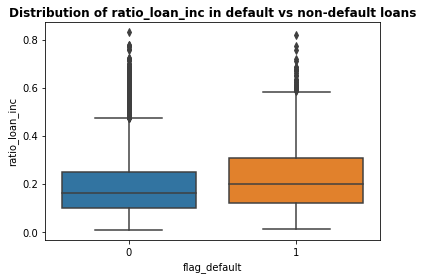

In [50]:
f, axes=plt.subplots(nrows =1,ncols=1)
axes.set_title("Distribution of {} in default vs non-default loans".format("ratio_loan_inc"),weight='bold')
sns.boxplot( x=df_loan['flag_default'],y=df_loan["ratio_loan_inc"].dropna(),orient='v')

In [66]:
df_loan[df_loan["purpose"]=="small_business"].groupby('grade')['id'].count()#/df_loan[df_loan["purpose"]=="small_business"].shape[0]

grade
A    329
B    421
C    312
D    268
E    173
F     81
G     45
Name: id, dtype: int64

In [78]:
df_loan.groupby('verification_status')['flag_default'].sum()/df_loan.groupby('verification_status')['id'].count()

verification_status
Not Verified       0.128615
Source Verified    0.149538
Verified           0.173186
dtype: float64

In [85]:
df_loan[df_loan["purpose"]=="small_business"].groupby(['grade','int_rate_bins'])['id'].count().sort_values(ascending=False)#/df_loan[df_loan["purpose"]=="small_business"].shape[0]

grade  int_rate_bins
B      low              340
A      low              329
C      medium           301
D      medium           263
E      medium           133
B      medium            81
F      high              74
G      high              45
E      high              40
C      low               11
F      medium             7
D      high               5
Name: id, dtype: int64